# Project 1: SAT & ACT Analysis


## Problem Statement

Identify where(in which state) is money best spent on to increase participation rate.

## Executive Summary

The new format for the SAT was released in March 2016. As an employee of the College Board - the organization that administers the SAT - I am part of a team that tracks statewide participation and recommends where money is best spent to improve SAT participation rates. 

Based on my analysis below, I will seek to identify trends in the data and combine data analysis with outside research to identify likely factors influencing participation rates and scores in various states.



### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

*All libraries used are added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
sns.set_style('white')

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [3]:
#Code:
sat17 = pd.read_csv('data/sat_2017.csv')
act17 = pd.read_csv('data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
#Code:
sat17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
act17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

<b>Answer:</b> <br>
Description based on data viewed above: <br>
<u>For SAT 2017 data:</u><br>
The data above shows the Participation rate, average score for each of the two sections (Evidence-Based Reading and Writing, and Math), and the average total scores for each state.<br>
There is a total of 5 columns above.<br><br>

<u>For ACT 2017 data:</u><br>
Shows Participation rate, average score for each of the four sections (English, Math, Reading and Science), and the average composite score across the sections, for each state. <br>
An additional row of national average scores was included in the dataset.<br>
There is a total of 7 columns above.<br><br>


In [6]:
sat17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [7]:
sat17.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [8]:
act17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


#### 4a. Does the data look complete? 

Answer: Yes

In [9]:
sat17.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [10]:
act17.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

<b>Answer:</b><br>

<b>Background:</b><br><br>
<u>SAT scores:</u><br>
The SAT score range is 400-1600 for total score, and 200-800 for each of the two section scores. One section score is Math, while the other is a combined Reading and Writing score called Evidence-Based Reading and Writing (ERW).<br><br>

<u>ACT scores:</u><br>
The ACT is scored on a scale of 1–36.<br>
There are 4 sections on the ACT: English, Math, Reading, and Science. Each section is scored out of 36 points. Composite ACT score is an average of the 4 section scores.<br>
<br>

<b>2017 SAT data:</b><br>
The min for Math score is not within range. The min is stated to be 52, probably a typo error in the dataset.<br><br>

<b>2017 ACT data:</b><br>
It seems that the min Science score of 2.3 is an outlier, probably a typo in the dataset.<br><br>

Errors are fixed in 4c by comparing to source dataset.<br>

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [11]:
#Outlier 2017 SAT min math score
#Check data corresponds with source data https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/
sat17.loc[sat17['State']=="Maryland", ['Math']] = 524

#Outlier 2017 ACT min science score
#Check data corresponds with source data https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf
act17[act17['Science'] <10]
act17.loc[act17['State']=="Maryland", ['Science']] = 23.2
act17[act17['State'] == "Maryland"]



,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6


#### 5. What are your data types? 
Display the data types of each feature. 

In [12]:
sat17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [13]:
act17.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:<br>
Yes. <br>
ACT and SAT Participation rate is not supposed to be an object type. Propose change to integer.<br>
ACT Composite score is not supposed to be object type. Propose change to float.<br>

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [14]:
#function to remove % symbol, and conver to integer type. 
def convert_part(x):
    if type(x) == str:
        return (int(x.replace("%","")))
    else:
        return int(x)

In [15]:
#apply function to 2017 SAT data
sat17['Participation'] = sat17['Participation'].map(convert_part)

In [16]:
#apply function to 2017 ACT data
act17['Participation'] = act17['Participation'].map(convert_part)

- Fix any individual values preventing other columns from being the appropriate type.

In [17]:
#Find unique data in ACT Composite scores
act17['Composite'].unique()

array(['21.0', '19.2', '19.8', '19.7', '19.4', '22.8', '20.8', '25.2',
       '24.1', '24.2', '21.4', '19.0', '22.3', '22.6', '21.9', '21.7',
       '20.0', '19.5', '24.3', '23.6', '25.4', '21.5', '18.6', '20.4',
       '20.3', '17.8', '25.5', '23.9', '19.1', '22.0', '21.8', '23.7',
       '24.0', '18.7', '20.7', '23.8', '20.5', '20.2x'], dtype=object)

In [18]:
#convert object type to float and remove foreign value "x"
def remove_x(y):
    if type(y) == str:
        return float(y.replace("x",""))
    else:
        return float(y)

In [19]:
#apply function to 2017 ACT Composite data
act17['Composite'] = act17['Composite'].map(remove_x)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [20]:
#code
act17.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [21]:
sat17.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [22]:
sat17.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [23]:
act17.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


- Display the data types again to confirm they are correct.

In [24]:
#Code:
sat17.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [25]:
act17.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [26]:
#Display 2017 ACT dataframe columns
act17.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [27]:
#Display 2017 SAT dataframe columns
sat17.columns

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [28]:
#Rename 2017 ACT columns
act17.rename(columns={
    'State': 'state',
    'Participation': 'act17_part',
    'English': 'act17_eng',
    'Math' : 'act17_math',
    'Reading' : 'act17_reading',
    'Science' : 'act17_sci',
    'Composite' : 'act17_composite'
}, inplace=True)


In [29]:
#Rename 2017 SAT columns
sat17.rename(columns={
    'State': 'state',
    'Participation': 'sat17_part',
    'Evidence-Based Reading and Writing': 'sat17_erw',
    'Math' : 'sat17_math',
    'Total' : 'sat17_total'
}, inplace=True)



#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 

|Feature|Type|Dataset|Description|
|:---|:---|:---|:---|
|**state**|*object*|ACT/SAT|State name| 
|**act17_part**|*integer*|ACT|2017 ACT Participation rate of each State (Values: 0-100)| 
|**act17_eng**|*float*|ACT|Average 2017 ACT English score of each State (Values: 0-36)| 
|**act17_math**|*float*|ACT|Average 2017 ACT Math score of each State (Values: 0-36)| 
|**act17_reading**|*float*|ACT|Average 2017 ACT Reading score of each State (Values: 0-36)| 
|**act17_sci**|*float*|ACT|Average 2017 ACT Science score of each State (Values: 0-36)| 
|**act17_composite**|*float*|ACT|Average 2017 ACT Composite score of each State (Values: 0-36)| 
|**sat17_part**|*integer*|SAT|2017 SAT Participation rate of each State (Values: 0-100)|  
|**sat17_erw**|*float*|SAT|Average 2017 SAT Evidence-Based Reading and Writing score of each State (Values: 200-800)| 
|**sat17_math**|*float*|SAT|Average 2017 SAT Math score of each State (Values: 200-800)| 
|**sat17_total**|*float*|SAT|Average 2017 SAT Total score of each State (Values: 400-1600)| 
|**act18_part**|*integer*|ACT|2018 ACT Participation rate of each State (Values: 0-100)| 
|**act18_eng**|*float*|ACT|Average 2018 ACT English score of each State (Values: 0-36)| 
|**act18_math**|*float*|ACT|Average 2018 ACT Math score of each State (Values: 0-36)| 
|**act18_reading**|*float*|ACT|Average 2018 ACT Reading score of each State (Values: 0-36)| 
|**act18_sci**|*float*|ACT|Average 2018 ACT Science score of each State (Values: 0-36)| 
|**act18_composite**|*float*|ACT|Average 2018 ACT Composite score of each State (Values: 0-36)| 
|**sat18_part**|*integer*|SAT|2018 SAT Participation rate of each State (Values: 0-100)| 
|**sat18_erw**|*float*|SAT|Average 2018 SAT Evidence-Based Reading and Writing score of each State (Values: 200-800)| 
|**sat18_math**|*float*|SAT|Average 2018 SAT Math score of each State (Values: 200-800)| 
|**sat18_total**|*float*|SAT|Average 2018 SAT Total score of each State (Values: 400-1600)| 
|**act_chng**|*integer*|ACT|Year on year change in ACT participation rate from 2017-2018 of each State (Values: -100-100)|
|**sat_chng**|*integer*|SAT|Year on year change in SAT participation rate from 2017-2018 of each State (Values: -100-100)|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [30]:
#Remove first row (National row) in 2017 ACT dataframe
act17.drop([0], axis=0, inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [31]:
#Merge 2017 ACT and 2017 SAT data into df17 (2017 dataframe)
df17 = pd.merge(act17, sat17, how="outer",on='state')

In [32]:
#Display head
df17.head()

,state,act17_part,act17_eng,act17_math,act17_reading,act17_sci,act17_composite,sat17_part,sat17_erw,sat17_math,sat17_total
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,1165
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,38,547,533,1080
2,Arizona,62,18.6,19.8,20.1,19.8,19.7,30,563,553,1116
3,Arkansas,100,18.9,19.0,19.7,19.5,19.4,3,614,594,1208
4,California,31,22.5,22.7,23.1,22.2,22.8,53,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [33]:
#Save to csv file in data folder as combined_2017.csv
df17.to_csv('data/combined_2017.csv', index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [34]:
#Read 2018 data
#Read act_2018_updated.csv
#Read sat_2018.csv 
act18 = pd.read_csv('data/act_2018_updated.csv')
sat18 = pd.read_csv('data/sat_2018.csv')

In [35]:
#Display top 5 rows of 2018 ACT data
act18.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [36]:
#Display top 5 rows of 2018 SAT data
sat18.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [37]:
#Renaming columns for 2018 data

act18.rename(columns={
    'State': 'state',
    'Percentage of Students Tested': 'act18_part',
    'Average English Score': 'act18_eng',
    'Average Math Score' : 'act18_math',
    'Average Reading Score' : 'act18_reading',
    'Average Science Score' : 'act18_sci',
    'Average Composite Score' : 'act18_composite'
}, inplace=True)

sat18.rename(columns={
    'State': 'state',
    'Participation': 'sat18_part',
    'Evidence-Based Reading and Writing': 'sat18_erw',
    'Math' : 'sat18_math',
    'Total' : 'sat18_total'
}, inplace=True)



In [38]:
#Changing object type of sat18_part to integer and remove "%" sign
sat18['sat18_part'] = sat18['sat18_part'].map(convert_part)

In [39]:
#Check for any unusual figures not in range
act18.describe()

,act18_part,act18_composite,act18_eng,act18_math,act18_reading,act18_sci
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [40]:
#Check for any unusual figures not in range
sat18.describe()

,sat18_part,sat18_erw,sat18_math,sat18_total
count,51.000000,51.000000,51.000000,51.000000
mean,45.745098,563.686275,556.235294,1120.019608
std,37.314256,47.502627,47.772623,94.155083
min,2.000000,480.000000,480.000000,977.000000
25%,4.500000,534.500000,522.500000,1057.500000
50%,52.000000,552.000000,544.000000,1098.000000
75%,77.500000,610.500000,593.500000,1204.000000
max,100.000000,643.000000,655.000000,1298.000000


In [41]:
#Check for datatype and counts
act18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            51 non-null     object 
 1   act18_part       51 non-null     int64  
 2   act18_composite  51 non-null     float64
 3   act18_eng        51 non-null     float64
 4   act18_math       51 non-null     float64
 5   act18_reading    51 non-null     float64
 6   act18_sci        51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [42]:
#Check for datatype and counts
sat18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   state        51 non-null     object
 1   sat18_part   51 non-null     int64 
 2   sat18_erw    51 non-null     int64 
 3   sat18_math   51 non-null     int64 
 4   sat18_total  51 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [43]:
#Merge 2018 ACT and SAT dataframes and assign to df18 
df18 = pd.merge(act18, sat18, how='outer', on='state')

In [44]:
#Display top 5 rows
df18.head()

,state,act18_part,act18_composite,act18_eng,act18_math,act18_reading,act18_sci,sat18_part,sat18_erw,sat18_math,sat18_total
0,Alabama,100,19.1,18.9,18.3,19.6,19.0,6,595,571,1166
1,Alaska,33,20.8,19.8,20.6,21.6,20.7,43,562,544,1106
2,Arizona,66,19.2,18.2,19.4,19.5,19.2,29,577,572,1149
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4,5,592,576,1169
4,California,27,22.7,22.5,22.5,23.0,22.1,60,540,536,1076


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [45]:
#Merge into single dataframe as df
df = pd.merge(df17, df18, how='outer', on='state')

In [46]:
#Save Merged 2017 and 2018 data into csv file
df.to_csv('data/final.csv',index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [47]:
#Transpose describe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
act17_part,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act17_eng,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act17_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act17_sci,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act17_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5
sat17_part,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat17_erw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat17_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [48]:
#Function to calculate standard deviation

def std_dev(population):
    n = len(population)
    u = population.mean()
    a=0
    for x in population:
        a = a + ((x-u)**2)
    return (a/n)**(0.5)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [49]:
sd = {x : std_dev(df[x]) for x in df.columns if x!='state'}

In [50]:
#Check dictionary output
sd

{'act17_part': 31.824175751231806,
 'act17_eng': 2.3304876369363363,
 'act17_math': 1.9624620273436781,
 'act17_reading': 2.0469029314842646,
 'act17_sci': 1.7222161451443676,
 'act17_composite': 2.000786081581989,
 'sat17_part': 34.92907076664508,
 'sat17_erw': 45.21697020437866,
 'sat17_math': 46.65713364485503,
 'sat17_total': 91.58351056778743,
 'act18_part': 33.745194881997506,
 'act18_composite': 2.0855261815801147,
 'act18_eng': 2.4222536143202795,
 'act18_math': 2.015707255555717,
 'act18_reading': 2.145891884510421,
 'act18_sci': 1.8516885484833543,
 'sat18_part': 36.946619223539415,
 'sat18_erw': 47.03460978357609,
 'sat18_math': 47.30194550378352,
 'sat18_total': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

### Answer: 
<br>
No, sd output <b>does not match</b> the output from pandas describe. Instead, sd output matches numpy's std method. 
This is apparent since pandas std uses (n-1) instead of n like the manual formulae and like numpy does.<br><br>
See below for worked out values.

In [51]:
# Manual function is equal to numpy std method
std_dev(df['act18_part']) == np.std(df['act18_part'])

True

In [52]:
# numpy std method
np.std(df['act18_part'])

33.745194881997506

In [53]:
#pandas std output
df['act18_part'].std()

34.08097623567245

In [54]:
#tweaked manual function to change n to n-1

def std_dev_pd(population):
    n = len(population) -1
    u = population.mean()
    a=0
    for x in population:
        a = a + ((x-u)**2)
    return (a/n)**(0.5)

std_dev_pd(df['act18_part'])

34.08097623567245

In [55]:
#pandas output == tweaked manual function to change n to n-1
df['act18_part'].std() == std_dev_pd(df['act18_part'])

True

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [56]:
#filter columns for better view of trends 
part_cols = ['state','act17_part', 'act17_composite', 'act18_part', 'act18_composite','sat17_part','sat17_total','sat18_part','sat18_total']

# Top 5 States with lowest particiation rate in 2017 ACT
df[part_cols].sort_values('act17_part', ascending=True).head()

,state,act17_part,act17_composite,act18_part,act18_composite,sat17_part,sat17_total,sat18_part,sat18_total
19,Maine,8,24.3,7,24.0,95,1012,99,1013
29,New Hampshire,18,25.5,16,25.1,96,1052,96,1063
7,Delaware,18,24.1,17,23.2,100,996,100,998
39,Rhode Island,21,24.0,15,24.2,71,1062,97,1018
38,Pennsylvania,23,23.7,20,23.5,65,1071,70,1086


Seems like Delaware has made SAT a complusory/free test, while ACT is optional.<br>
There seems to be an inverse relationship between the ACT scores and ACT participation rates. 
Though certain states (Albama, Kentucky) had a 100% participation in SAT for 2017 and 2018, the state average composite score (19~20.2) is relatively lower than other states who have a lower participation rate in ACT (eg. Maine, Rhode Island (24 ~ 25))

In [57]:
# Top 5 States with lowest particiation rate in 2018 ACT
df[part_cols].sort_values('act18_part', ascending=True).head()

,state,act17_part,act17_composite,act18_part,act18_composite,sat17_part,sat17_total,sat18_part,sat18_total
19,Maine,8,24.3,7,24.0,95,1012,99,1013
39,Rhode Island,21,24.0,15,24.2,71,1062,97,1018
29,New Hampshire,18,25.5,16,25.1,96,1052,96,1063
7,Delaware,18,24.1,17,23.2,100,996,100,998
38,Pennsylvania,23,23.7,20,23.5,65,1071,70,1086


In [58]:
# Top 10 States with highest particiation rate in 2017 ACT
df[part_cols].sort_values('act17_part', ascending=False).head(10)

,state,act17_part,act17_composite,act18_part,act18_composite,sat17_part,sat17_total,sat18_part,sat18_total
0,Alabama,100,19.2,100,19.1,5,1165,6,1166
17,Kentucky,100,20.0,100,20.2,4,1247,4,1248
49,Wisconsin,100,20.5,100,20.5,3,1291,3,1294
44,Utah,100,20.3,100,20.4,3,1238,4,1010
42,Tennessee,100,19.8,100,19.6,5,1228,6,1231
40,South Carolina,100,18.7,100,18.3,50,1064,55,1070
36,Oklahoma,100,19.4,100,19.3,7,1047,8,1062
33,North Carolina,100,19.1,100,19.1,49,1081,52,1098
28,Nevada,100,17.8,100,17.7,26,1116,23,1140
26,Montana,100,20.3,100,20.0,10,1196,10,1198


The Top 10 states with highest participation rates in ACT seemed to have made ACT a complusory test as there is a 100% participation rate for both 2017 and 2018. <br>
Note that North Carolina and South Carolina has 100% participation rate in ACT for both years, and also had approx. 50% participation rate in SAT test for both years.

In [59]:
# Top 10 States with highest particiation rate in 2018 ACT 
df[part_cols].sort_values('act18_part', ascending=False).head(10)

,state,act17_part,act17_composite,act18_part,act18_composite,sat17_part,sat17_total,sat18_part,sat18_total
0,Alabama,100,19.2,100,19.1,5,1165,6,1166
17,Kentucky,100,20.0,100,20.2,4,1247,4,1248
49,Wisconsin,100,20.5,100,20.5,3,1291,3,1294
44,Utah,100,20.3,100,20.4,3,1238,4,1010
42,Tennessee,100,19.8,100,19.6,5,1228,6,1231
40,South Carolina,100,18.7,100,18.3,50,1064,55,1070
36,Oklahoma,100,19.4,100,19.3,7,1047,8,1062
35,Ohio,75,22.0,100,20.3,12,1149,18,1099
33,North Carolina,100,19.1,100,19.1,49,1081,52,1098
28,Nevada,100,17.8,100,17.7,26,1116,23,1140


In [60]:
# Top 5 States with lowest particiation rate in 2017 SAT
df[part_cols].sort_values('sat17_part', ascending=True).head()

,state,act17_part,act17_composite,act18_part,act18_composite,sat17_part,sat17_total,sat18_part,sat18_total
34,North Dakota,98,20.3,98,20.3,2,1256,2,1283
24,Mississippi,100,18.6,100,18.6,2,1242,3,1236
15,Iowa,67,21.9,68,21.8,2,1275,3,1265
25,Missouri,100,20.4,100,20.0,3,1271,4,1262
44,Utah,100,20.3,100,20.4,3,1238,4,1010


States with very low participation rate in SAT for both years tend to have a high participation rate in ACT test (>65%). 

In [61]:
# Top 5 States with lowest particiation rate in 2018 SAT
df[part_cols].sort_values('sat18_part', ascending=True).head()

,state,act17_part,act17_composite,act18_part,act18_composite,sat17_part,sat17_total,sat18_part,sat18_total
34,North Dakota,98,20.3,98,20.3,2,1256,2,1283
50,Wyoming,100,20.2,100,20.0,3,1230,3,1257
41,South Dakota,80,21.8,77,21.9,3,1216,3,1240
27,Nebraska,84,21.4,100,20.1,3,1253,3,1252
49,Wisconsin,100,20.5,100,20.5,3,1291,3,1294


In [62]:
# Top 10 States with highest particiation rate in 2017 SAT
df[part_cols].sort_values('sat17_part', ascending=False).head(10)

,state,act17_part,act17_composite,act18_part,act18_composite,sat17_part,sat17_total,sat18_part,sat18_total
8,District of Columbia,32,24.2,32,23.6,100,950,92,977
22,Michigan,29,24.1,22,24.4,100,1005,100,1011
6,Connecticut,31,25.2,26,25.6,100,1041,100,1053
7,Delaware,18,24.1,17,23.2,100,996,100,998
29,New Hampshire,18,25.5,16,25.1,96,1052,96,1063
19,Maine,8,24.3,7,24.0,95,1012,99,1013
12,Idaho,38,22.3,36,22.3,93,1005,100,1001
9,Florida,73,19.8,66,19.9,83,1017,56,1099
21,Massachusetts,29,25.4,25,25.5,76,1107,80,1125
39,Rhode Island,21,24.0,15,24.2,71,1062,97,1018


The top 10 States with highest particiation rate in sat seemed to have made SAT complusory and/or free, and consequently, low participation rates in ACT.
There is a "jump" in partication rates from taking ACT in 2017 to SAT in 2018 noted in the following states: Colorado, Illinois, Rhode Island. These stats could have adopted SAT as a complusory test.

Similar to the ACT, there seems to be an inverse relationship between the SAT scores and SAT participation rates. 
Though certain states (District of Columbia, Delaware) had a 100% participation in SAT for 2017 and 2018, the state average total score (900~1000) is relatively lower than other states who have a lower participation rate in SAT (eg. Albama, Kentucky (1100 ~ 1200)) <br><br>
A possible explanation to this occurrence could mean that those who are participating tend to be higher achieving in states with lower participation rates, while high participation (likely where the test is made mandatory) means that there is a wider range of student performance which attributes to a lower state average score.

In [63]:
# Top 10 States with highest particiation rate in 2018 SAT
df[part_cols].sort_values('sat18_part', ascending=False).head(10)


,state,act17_part,act17_composite,act18_part,act18_composite,sat17_part,sat17_total,sat18_part,sat18_total
5,Colorado,100,20.8,30,23.9,11,1201,100,1025
6,Connecticut,31,25.2,26,25.6,100,1041,100,1053
7,Delaware,18,24.1,17,23.2,100,996,100,998
22,Michigan,29,24.1,22,24.4,100,1005,100,1011
12,Idaho,38,22.3,36,22.3,93,1005,100,1001
19,Maine,8,24.3,7,24.0,95,1012,99,1013
13,Illinois,93,21.4,43,23.9,9,1115,99,1019
39,Rhode Island,21,24.0,15,24.2,71,1062,97,1018
29,New Hampshire,18,25.5,16,25.1,96,1052,96,1063
8,District of Columbia,32,24.2,32,23.6,100,950,92,977


In [64]:
#filter columns to view
scores = ['state','act17_composite','act18_composite','sat17_total','sat18_total']

In [65]:
#Highest 10 2017 ACT composite scores
df[scores].sort_values('act17_composite', ascending=False).head(10)

,state,act17_composite,act18_composite,sat17_total,sat18_total
29,New Hampshire,25.5,25.1,1052,1063
21,Massachusetts,25.4,25.5,1107,1125
6,Connecticut,25.2,25.6,1041,1053
19,Maine,24.3,24.0,1012,1013
8,District of Columbia,24.2,23.6,950,977
32,New York,24.2,24.5,1052,1068
22,Michigan,24.1,24.4,1005,1011
7,Delaware,24.1,23.2,996,998
39,Rhode Island,24.0,24.2,1062,1018
30,New Jersey,23.9,23.7,1056,1094


In [66]:
#Highest 10 2018 ACT composite scores
df[scores].sort_values('act18_composite', ascending=False).head(10)

,state,act17_composite,act18_composite,sat17_total,sat18_total
6,Connecticut,25.2,25.6,1041,1053
21,Massachusetts,25.4,25.5,1107,1125
29,New Hampshire,25.5,25.1,1052,1063
32,New York,24.2,24.5,1052,1068
22,Michigan,24.1,24.4,1005,1011
39,Rhode Island,24.0,24.2,1062,1018
45,Vermont,23.6,24.1,1114,1120
19,Maine,24.3,24.0,1012,1013
46,Virginia,23.8,23.9,1102,1117
5,Colorado,20.8,23.9,1201,1025


In [67]:
#Highest 10 2017 SAT total scores
df[scores].sort_values('sat17_total', ascending=False).head(10)

,state,act17_composite,act18_composite,sat17_total,sat18_total
23,Minnesota,21.5,21.3,1295,1298
49,Wisconsin,20.5,20.5,1291,1294
15,Iowa,21.9,21.8,1275,1265
25,Missouri,20.4,20.0,1271,1262
16,Kansas,21.7,21.6,1260,1265
34,North Dakota,20.3,20.3,1256,1283
27,Nebraska,21.4,20.1,1253,1252
17,Kentucky,20.0,20.2,1247,1248
24,Mississippi,18.6,18.6,1242,1236
44,Utah,20.3,20.4,1238,1010


In [68]:
#Highest 10 2018 SAT total scores
df[scores].sort_values('sat18_total', ascending=False).head(10)

,state,act17_composite,act18_composite,sat17_total,sat18_total
23,Minnesota,21.5,21.3,1295,1298
49,Wisconsin,20.5,20.5,1291,1294
34,North Dakota,20.3,20.3,1256,1283
15,Iowa,21.9,21.8,1275,1265
16,Kansas,21.7,21.6,1260,1265
25,Missouri,20.4,20.0,1271,1262
50,Wyoming,20.2,20.0,1230,1257
27,Nebraska,21.4,20.1,1253,1252
17,Kentucky,20.0,20.2,1247,1248
41,South Dakota,21.8,21.9,1216,1240


In [69]:
#States with 100% participation on a given test have a rate change year-to-year
df[part_cols][((df['act17_part']==100) & (df['act17_part']!=df['act18_part'])) |
              ((df['sat17_part'] == 100) & (df['sat17_part'] != df['sat18_part'])) ]

,state,act17_part,act17_composite,act18_part,act18_composite,sat17_part,sat17_total,sat18_part,sat18_total
5,Colorado,100,20.8,30,23.9,11,1201,100,1025
8,District of Columbia,32,24.2,32,23.6,100,950,92,977
23,Minnesota,100,21.5,99,21.3,3,1295,4,1298


In [70]:
#States that have >50% participation on both tests either year
df[part_cols][((df['act17_part']>50) & (df['sat17_part']>50))| ((df['act18_part']>50) & (df['sat18_part']>50)) ]


,state,act17_part,act17_composite,act18_part,act18_composite,sat17_part,sat17_total,sat18_part,sat18_total
9,Florida,73,19.8,66,19.9,83,1017,56,1099
10,Georgia,55,21.4,53,21.4,61,1050,70,1064
11,Hawaii,90,19.0,89,18.9,55,1085,56,1010
33,North Carolina,100,19.1,100,19.1,49,1081,52,1098
40,South Carolina,100,18.7,100,18.3,50,1064,55,1070


In states like Georgia where there seems to be no dominant test, it can be assumed that there is no state mandatory test in place. <br>
<br>
It is also notable that approx 50% of students in North Carolina and South Carolina are participating in both ACT and SAT. This could mean that there is a preference to SAT tests, despite ACT being mandatory in 2017 - 2018. <br>
<br>
https://www.thestate.com/news/politics-government/article236809728.html
https://www.newsobserver.com/news/local/article220102340.html

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

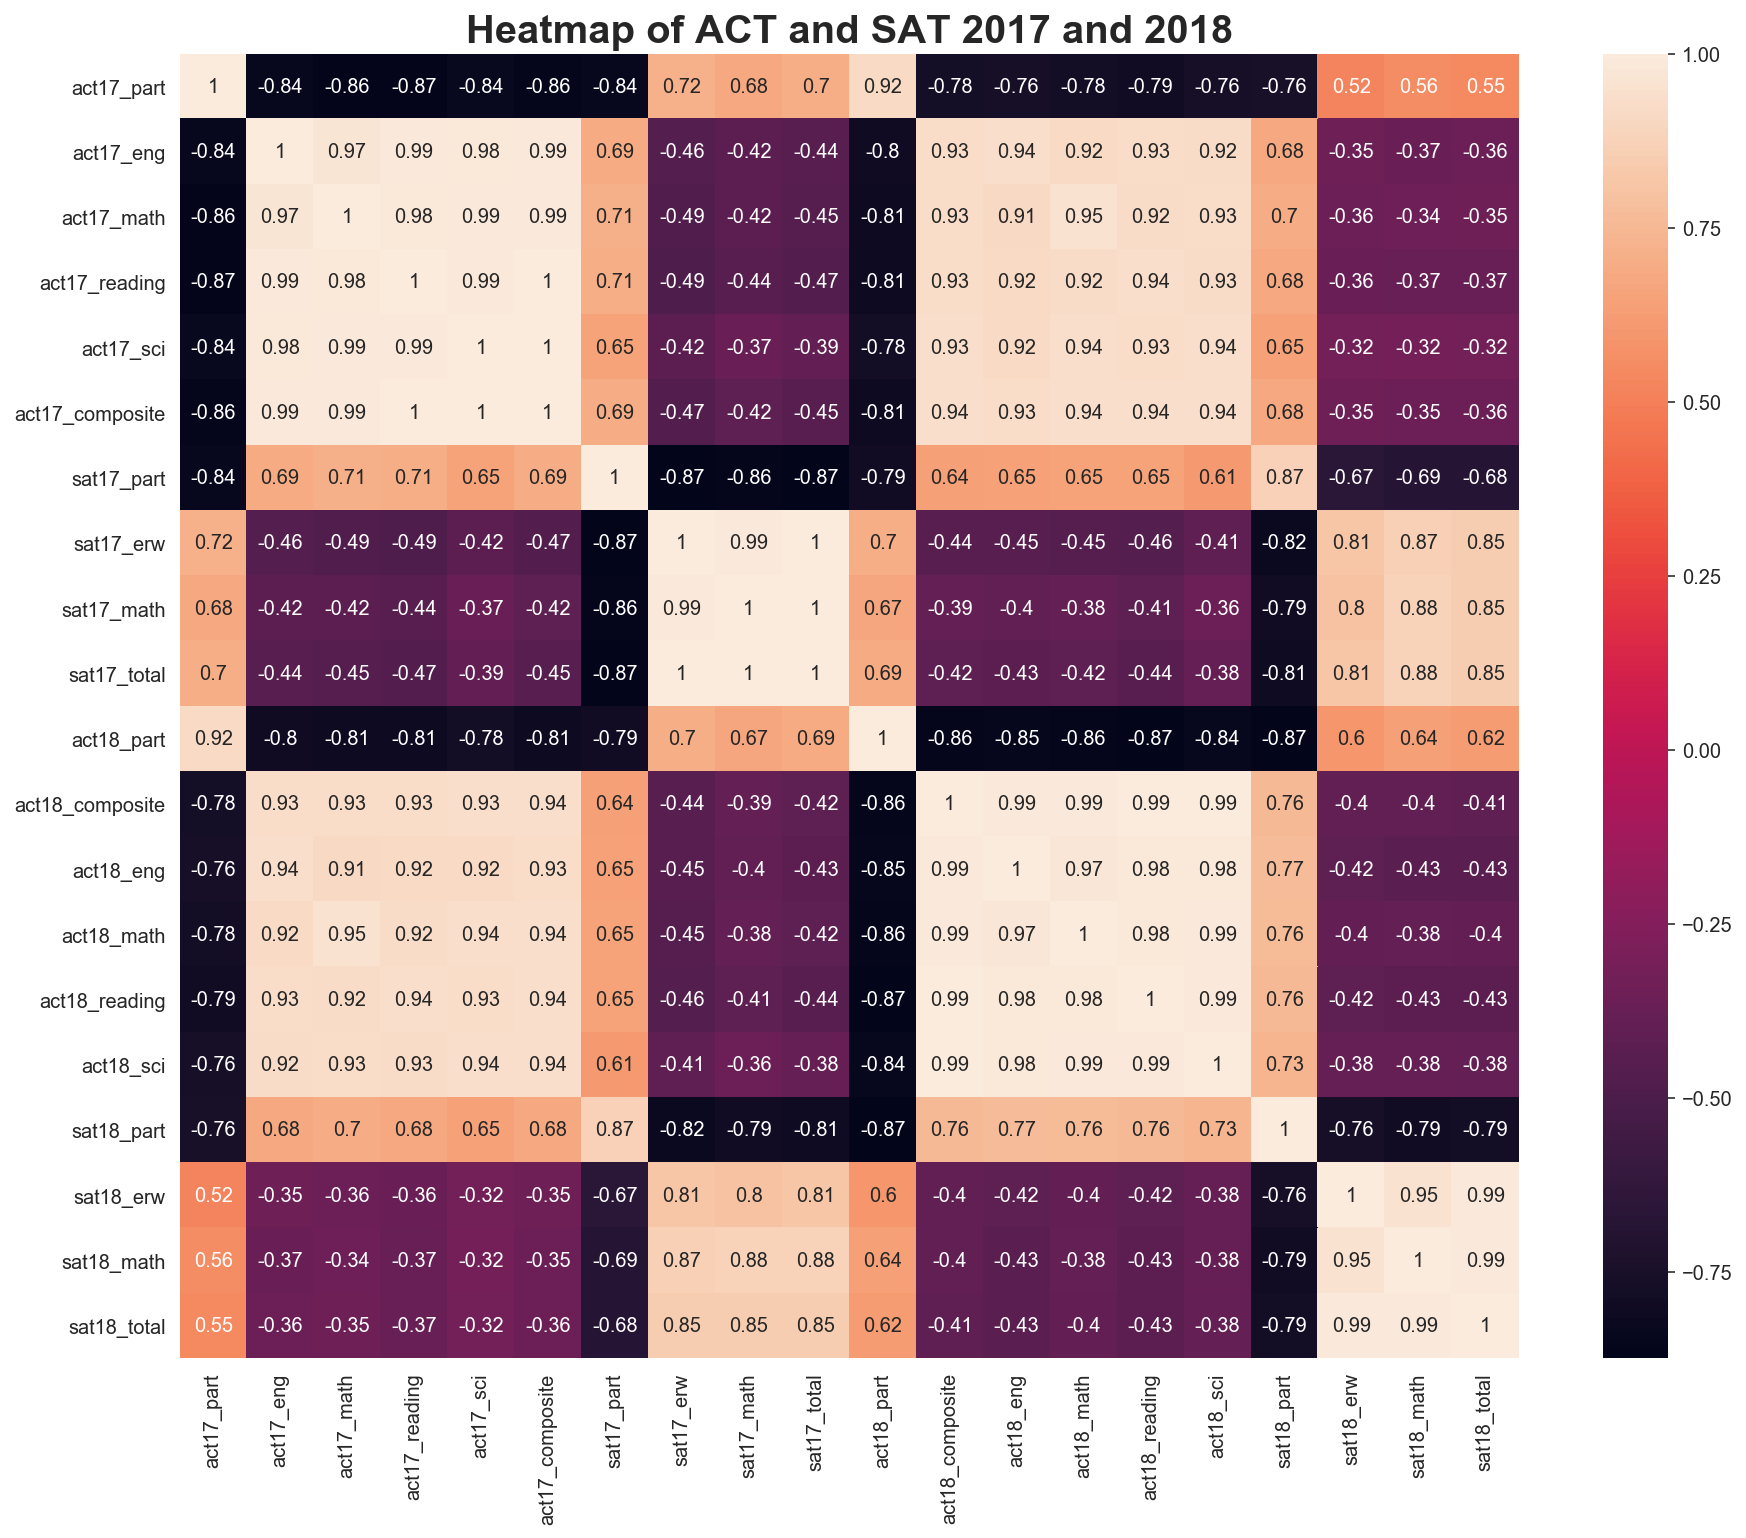

In [71]:
plt.figure(figsize=(15,12))
plt.title('Heatmap of ACT and SAT 2017 and 2018', fontweight='heavy', fontsize=20);
sns.heatmap(df.corr(),annot=True)


Trend of Negative correlation between ACT and SAT scores.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [72]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels, sharexaxis, shareyaxis):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, sharex=sharexaxis, sharey=shareyaxis, figsize=(20,8)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i],fontweight='bold',fontsize='16')
        ax[i].set_xlabel(list_of_xlabels[i], fontsize='12')
        ax[i].set_ylabel(list_of_ylabels[i], fontsize='12')
    fig.tight_layout();
#         ax[i].set_xticks(range(0,101,20))
#         ax[i].set_yticks(range(0,21,2))

      

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [73]:
parts = ['act17_part', 'sat17_part', 'act18_part','sat18_part']
parts_title = ['2017 ACT Participation rate', '2017 SAT Participation rate', '2018 ACT Participation rate', '2018 SAT Participation rate' ]

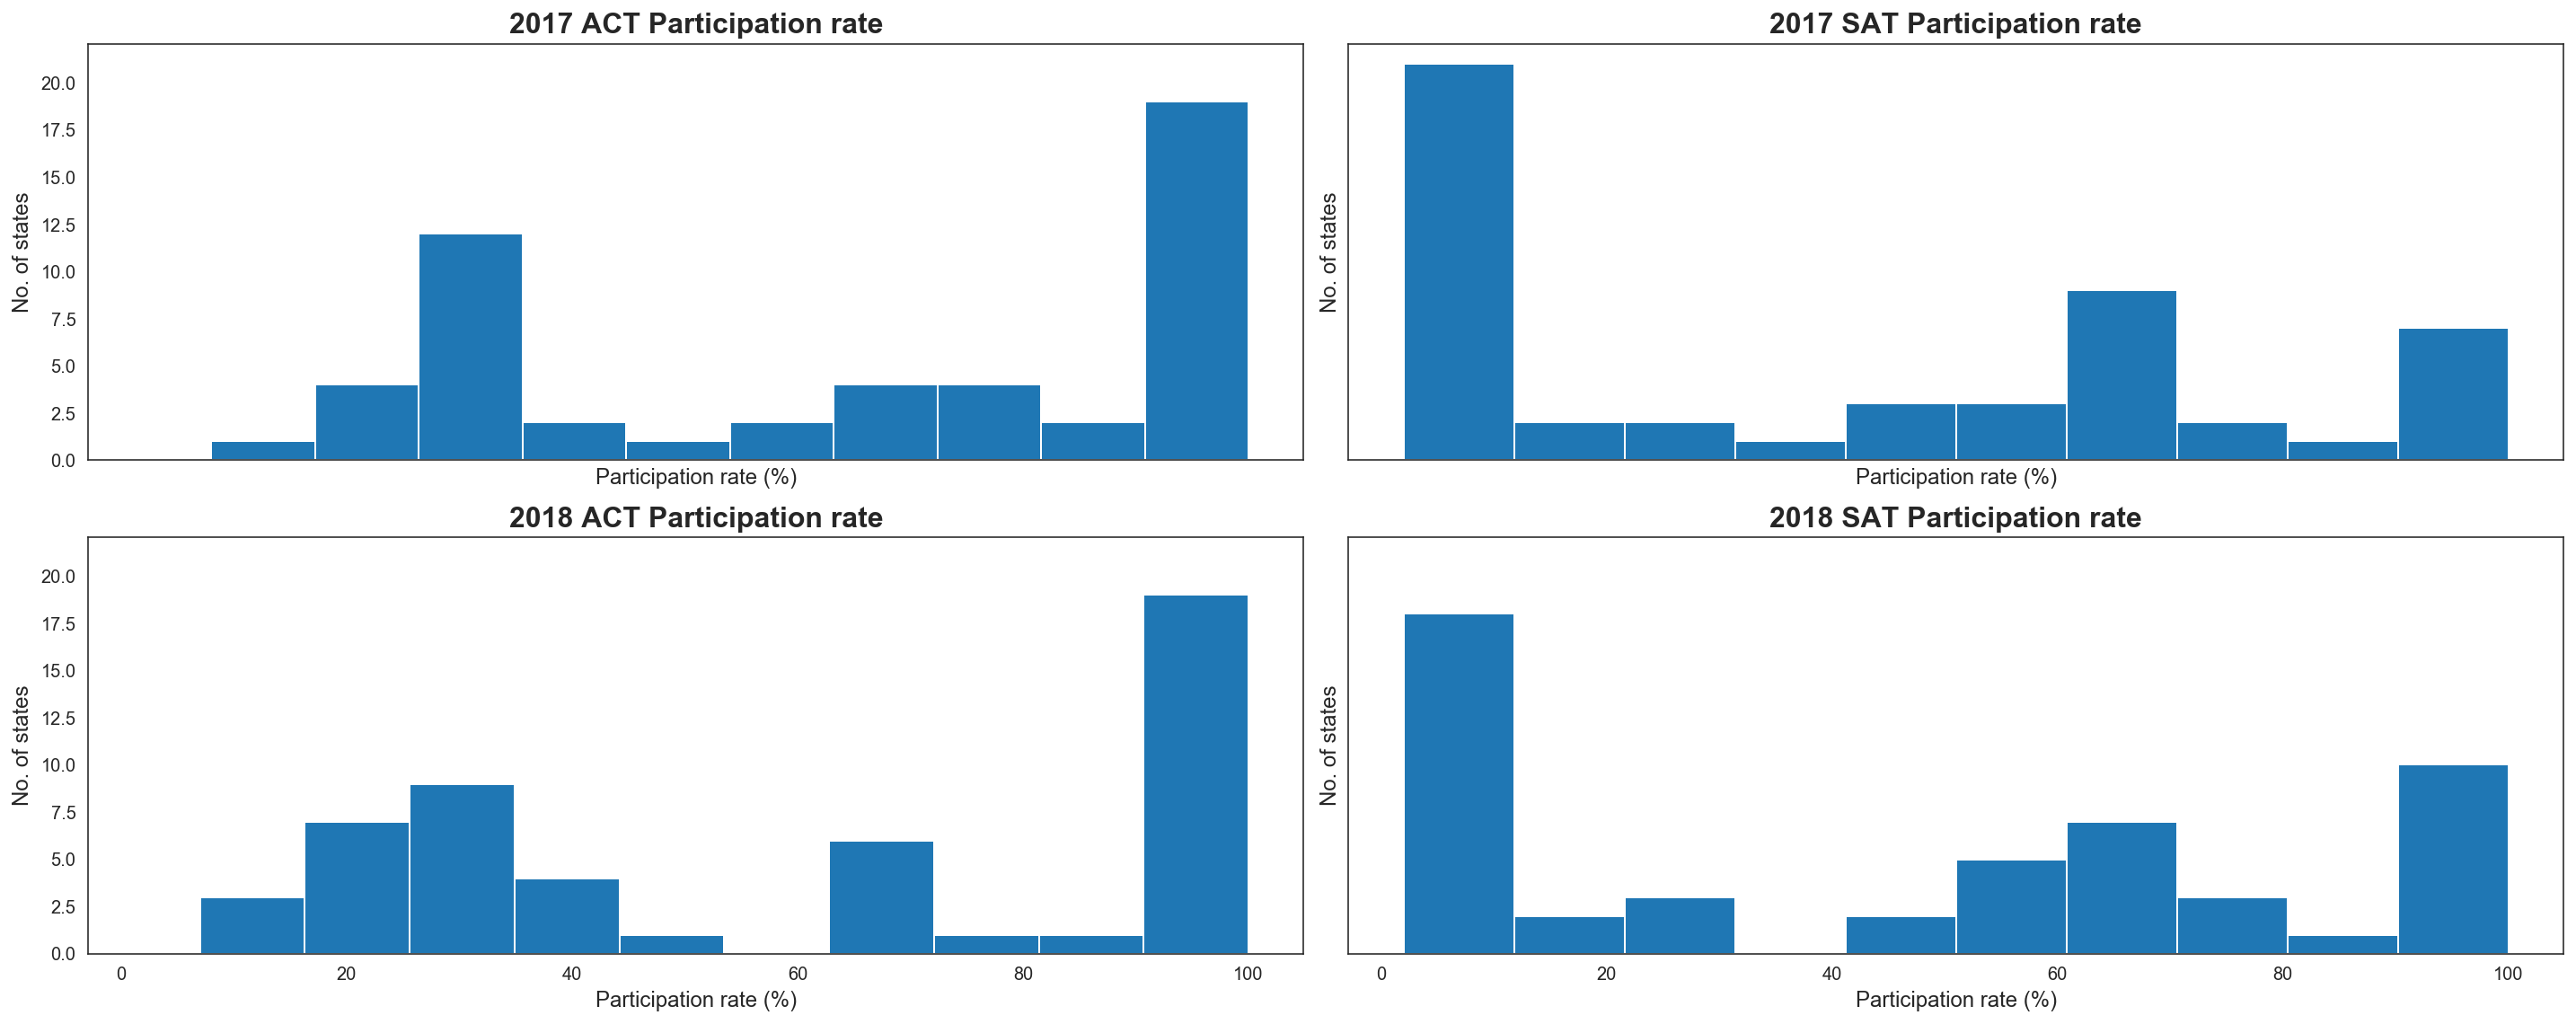

In [74]:
#Participation rates for SAT & ACT
#Note that share axis == True
subplot_histograms(df,
                   parts,
                   parts_title,
                   ["Participation rate (%)" for i in range(4)],
                   ["No. of states" for i in range(4)],
                  True, True)


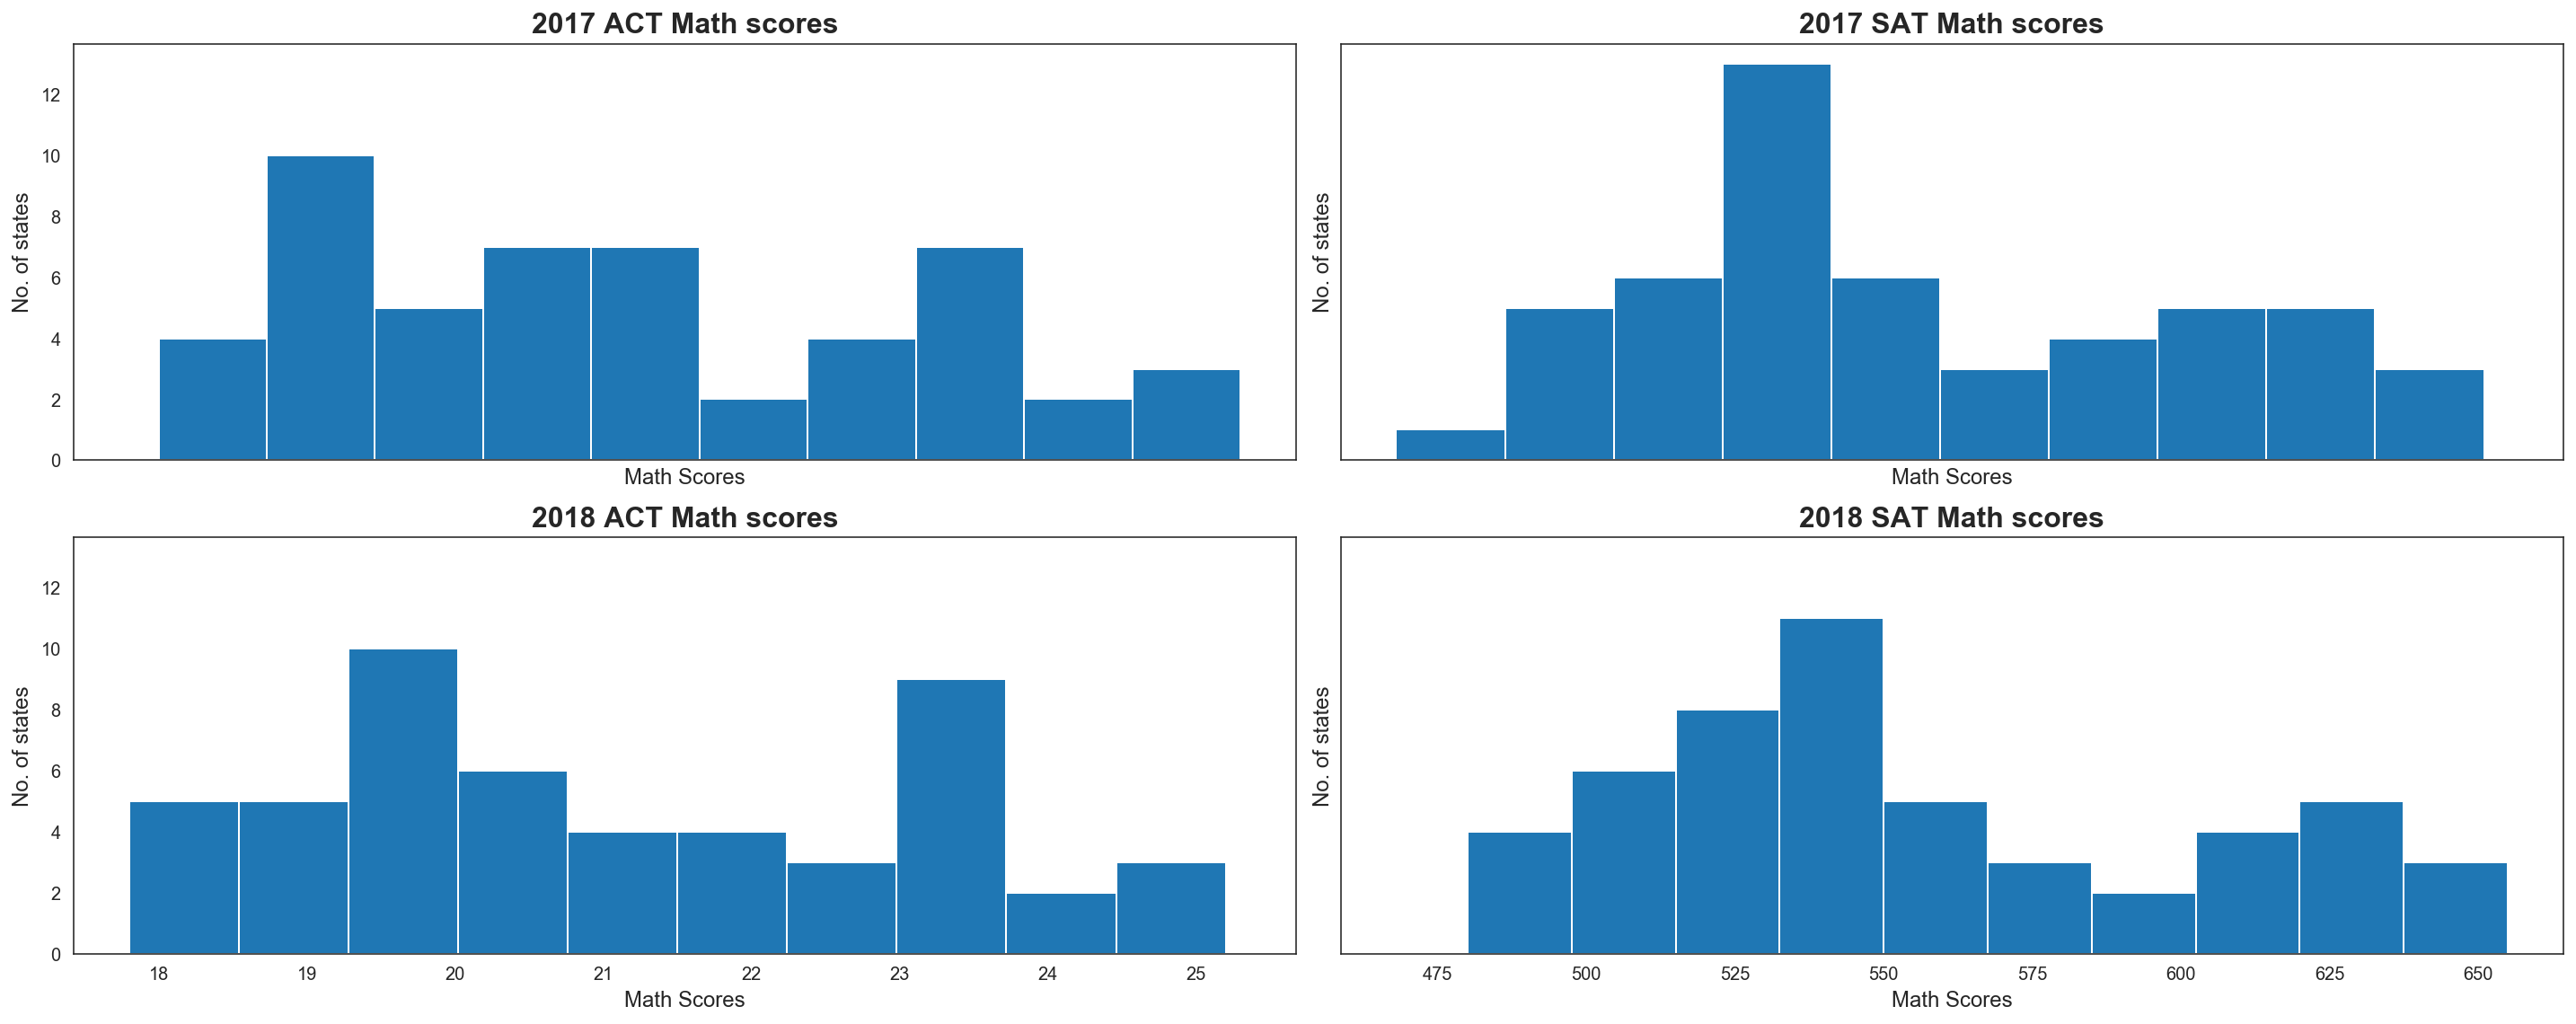

In [75]:
#Math scores for SAT & ACT
math_scores = ['act17_math', 'sat17_math', 'act18_math','sat18_math']
math_scores_title = ['2017 ACT Math scores', '2017 SAT Math scores', '2018 ACT Math scores', '2018 SAT Math scores' ]
math_scores_xlabel = ["Math Scores" for i in range(4)]
math_scores_ylabel = ["No. of states" for i in range(4)]

subplot_histograms(df,
                   math_scores,
                   math_scores_title,
                   math_scores_xlabel,
                   math_scores_ylabel,
                  'col', True)




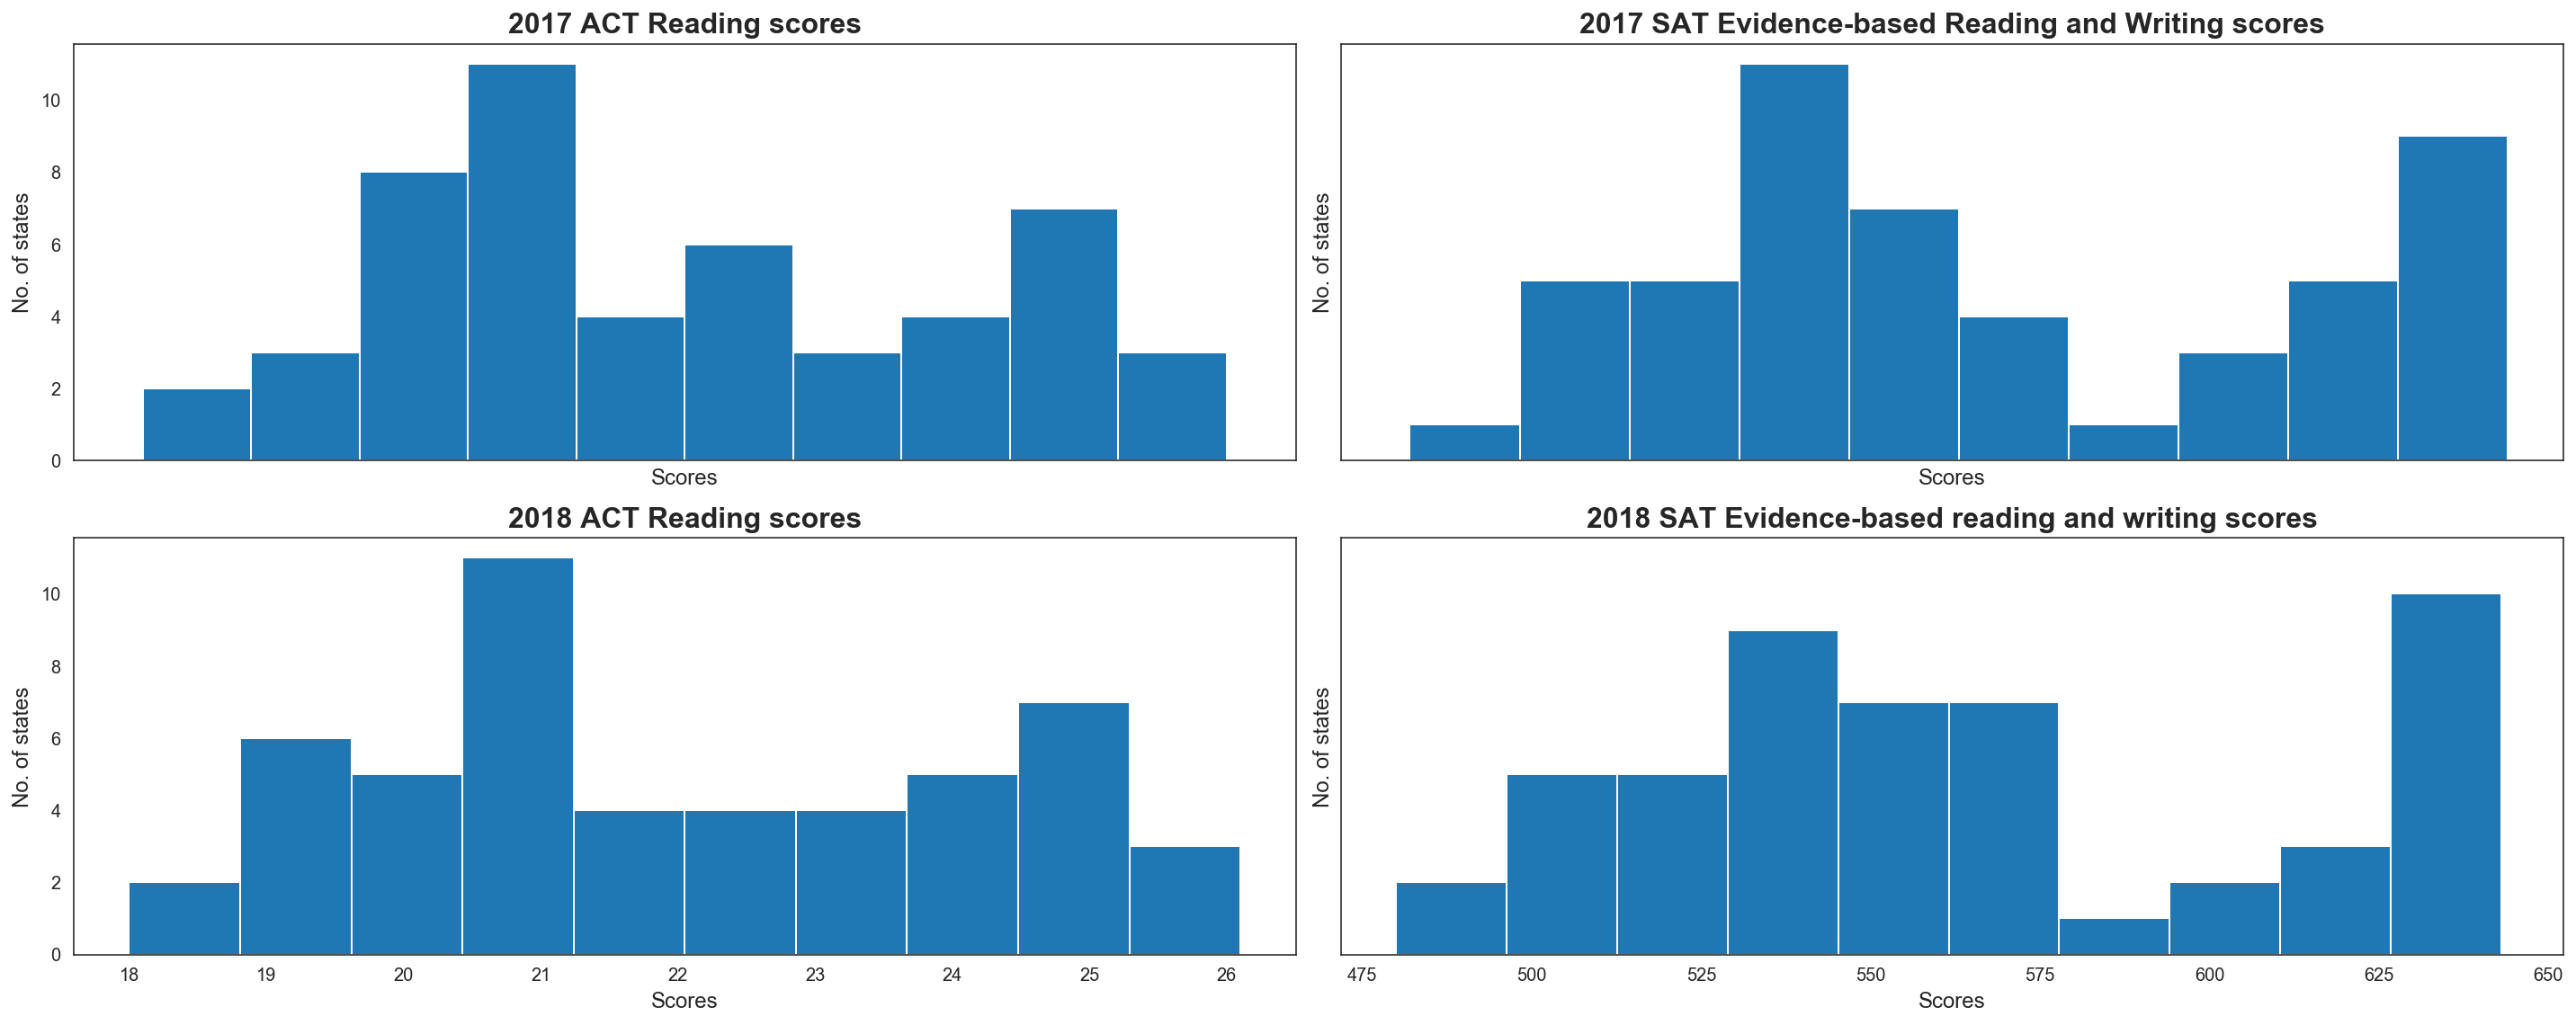

In [76]:
#Reading/verbal scores for SAT & ACT
read_scores = ['act17_reading', 'sat17_erw', 'act18_reading','sat18_erw']
read_scores_title = ['2017 ACT Reading scores', '2017 SAT Evidence-based Reading and Writing scores', '2018 ACT Reading scores', '2018 SAT Evidence-based reading and writing scores' ]
read_scores_xlabel = ["Scores" for i in range(4)]
read_scores_ylabel = ["No. of states" for i in range(4)]
subplot_histograms(df,
                   read_scores,
                   read_scores_title,
                   read_scores_xlabel,
                   read_scores_ylabel,
                  'col', True)




#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [77]:
# Code
def plot_scatter(dataframe, x_axis, y_axis, title, x_lab, y_lab):
    dataframe.plot(x=x_axis, y=y_axis, kind='scatter', grid=False,
                  color='dodgerblue', figsize=(15,5), s=50)
    plt.title(title, {'fontsize': '20',
        'fontweight' : 'heavy', 'fontname' : 'Arial Black'})
    plt.xlabel(x_lab, {'fontsize': '14','fontweight' : 'bold', 'fontname' : 'Arial'})
    plt.ylabel(y_lab, {'fontsize': '14','fontweight' : 'bold', 'fontname' : 'Arial'});


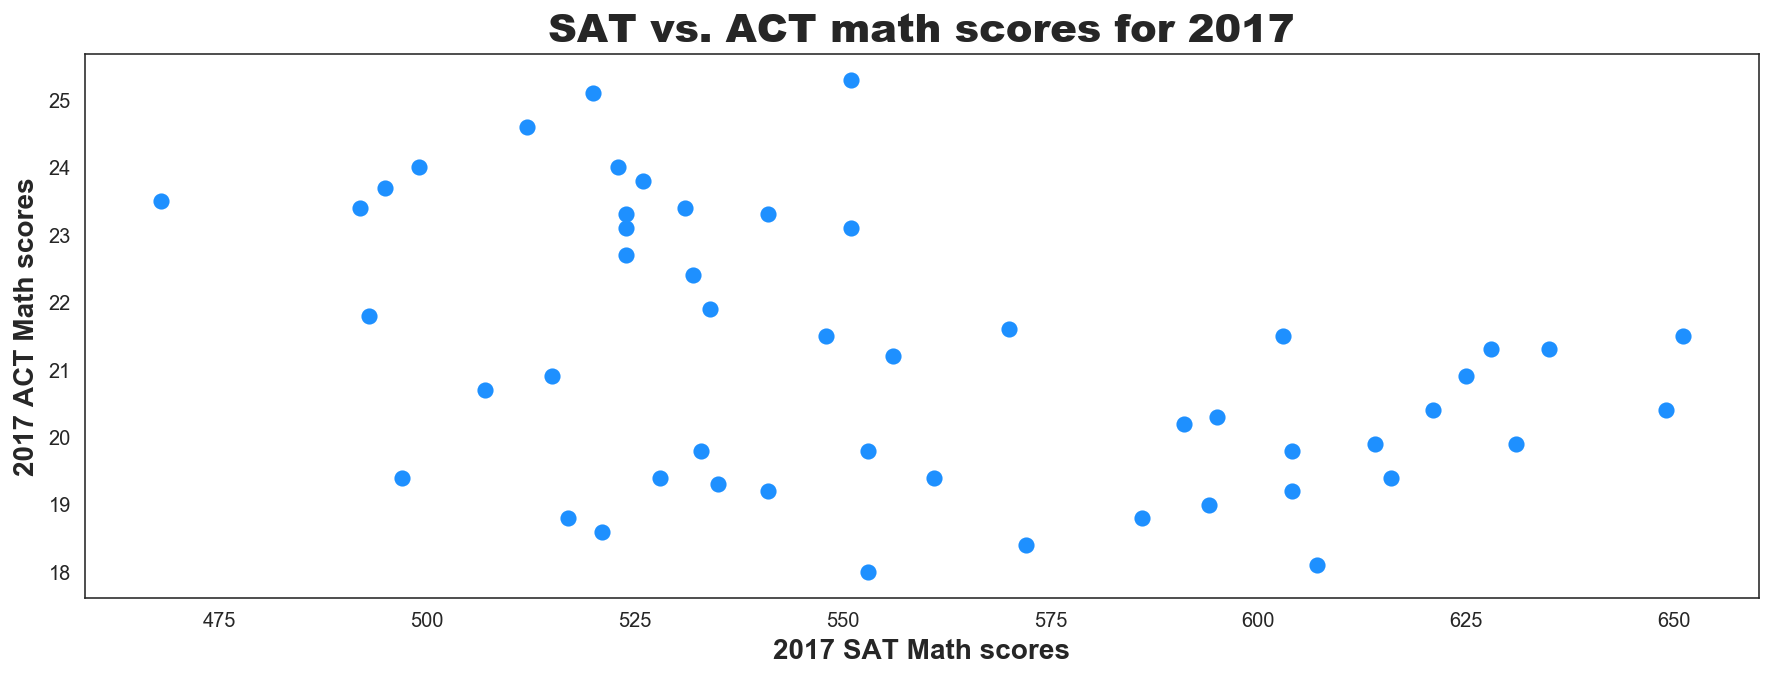

In [78]:
#Plot SAT vs. ACT math scores for 2017
plot_scatter(df, 'sat17_math', 'act17_math', 'SAT vs. ACT math scores for 2017', '2017 SAT Math scores', '2017 ACT Math scores')

#Seems to have an inverse relationship. 
#Higher the state average math section score for ACT, 
#lower the state average math section score for SAT.


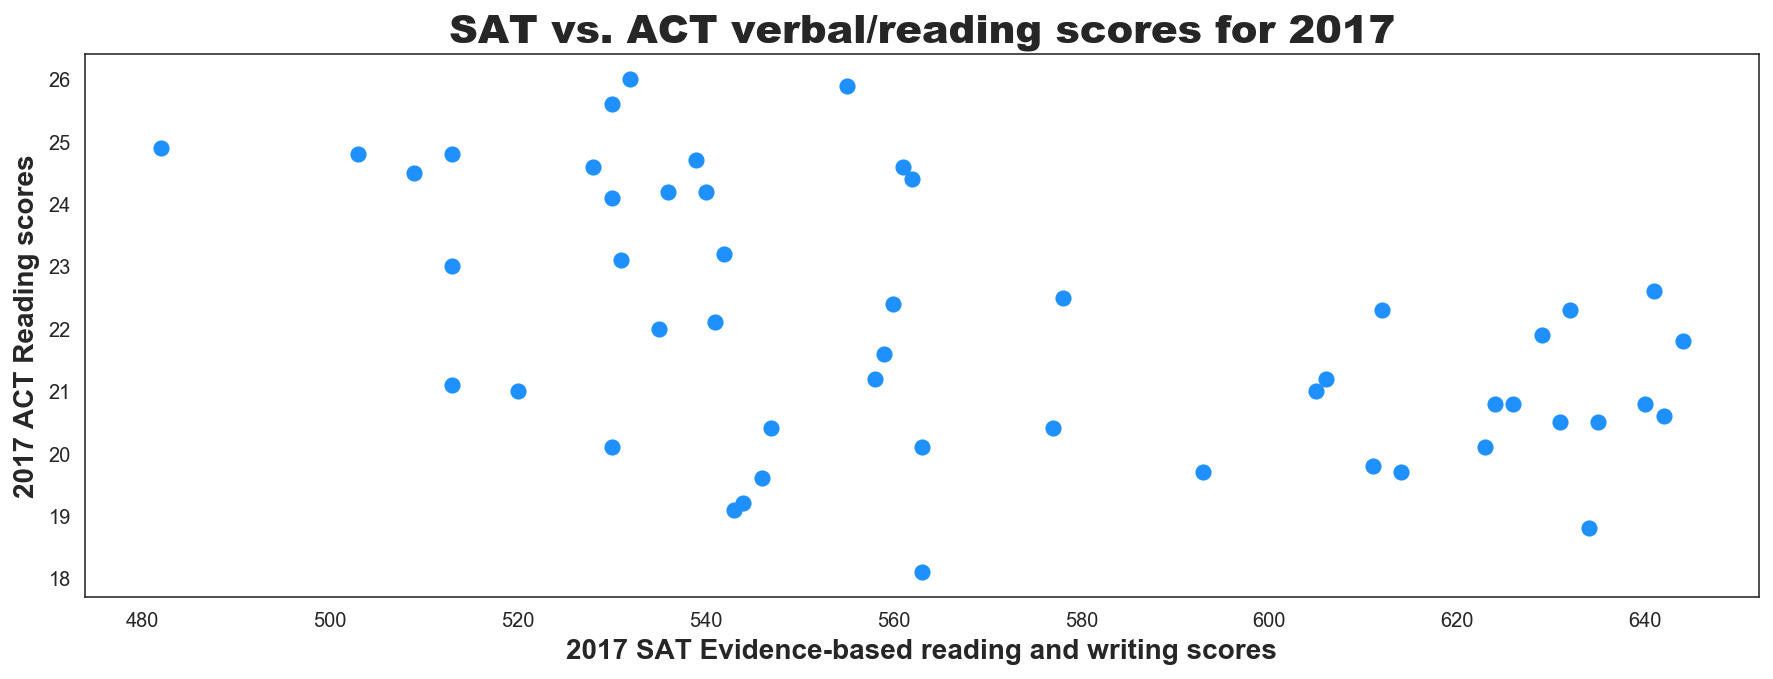

In [79]:
#Plot SAT vs. ACT verbal/reading scores for 2017
plot_scatter(df, 'sat17_erw', 'act17_reading', 'SAT vs. ACT verbal/reading scores for 2017', '2017 SAT Evidence-based reading and writing scores', '2017 ACT Reading scores')
#Seems to have an inverse relationship. 
#Higher the state average reading score for ACT, 
#lower the state average evidence-based reading and writing score for SAT.

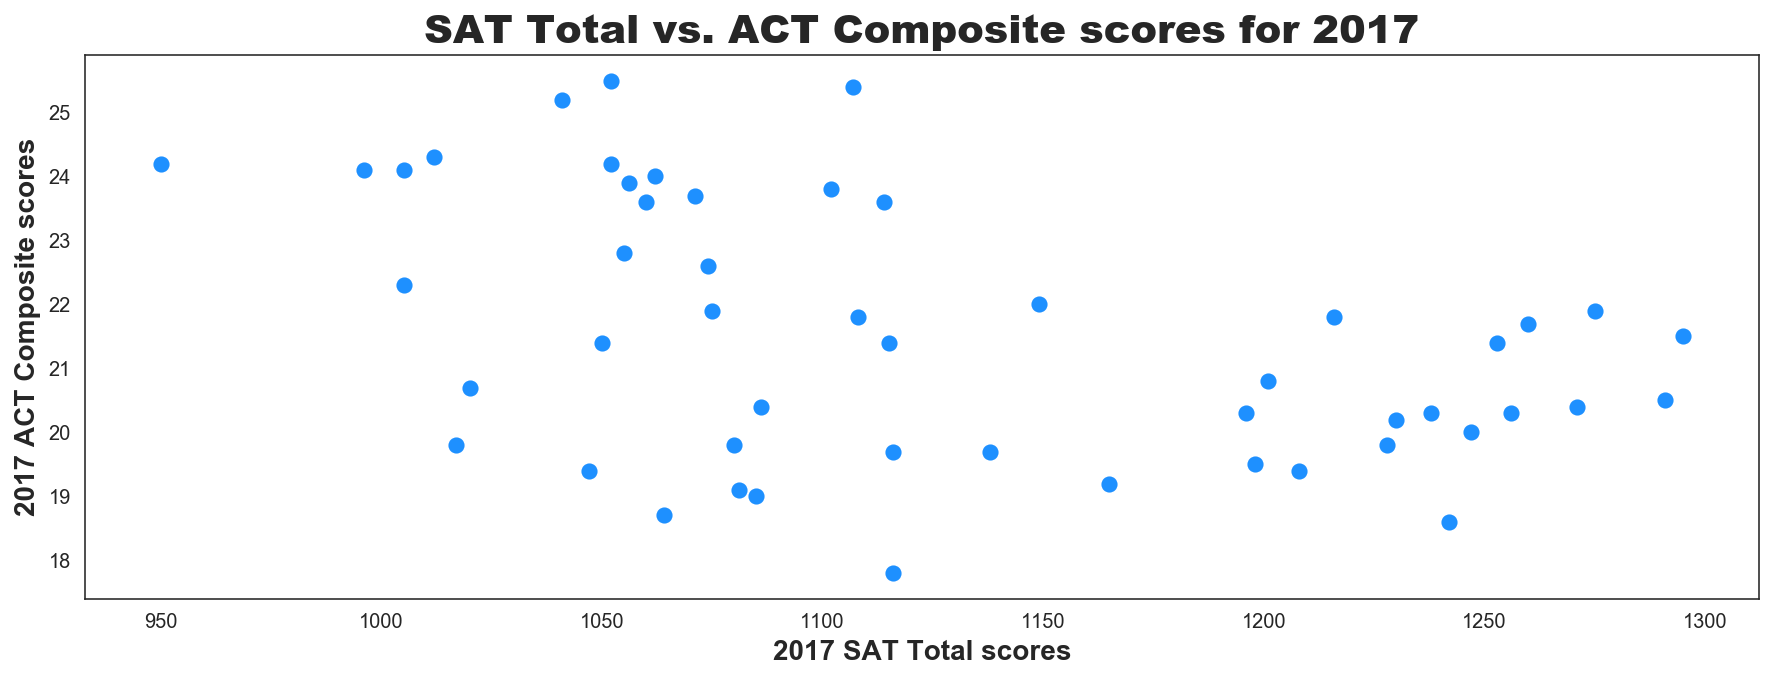

In [80]:
#Plot SAT vs. ACT total/composite scores for 2017
plot_scatter(df, 'sat17_total', 'act17_composite', 'SAT Total vs. ACT Composite scores for 2017', '2017 SAT Total scores', '2017 ACT Composite scores')
#Seems to have an inverse relationship. 
#Higher the state composite test score for ACT, lower the state average score for SAT.

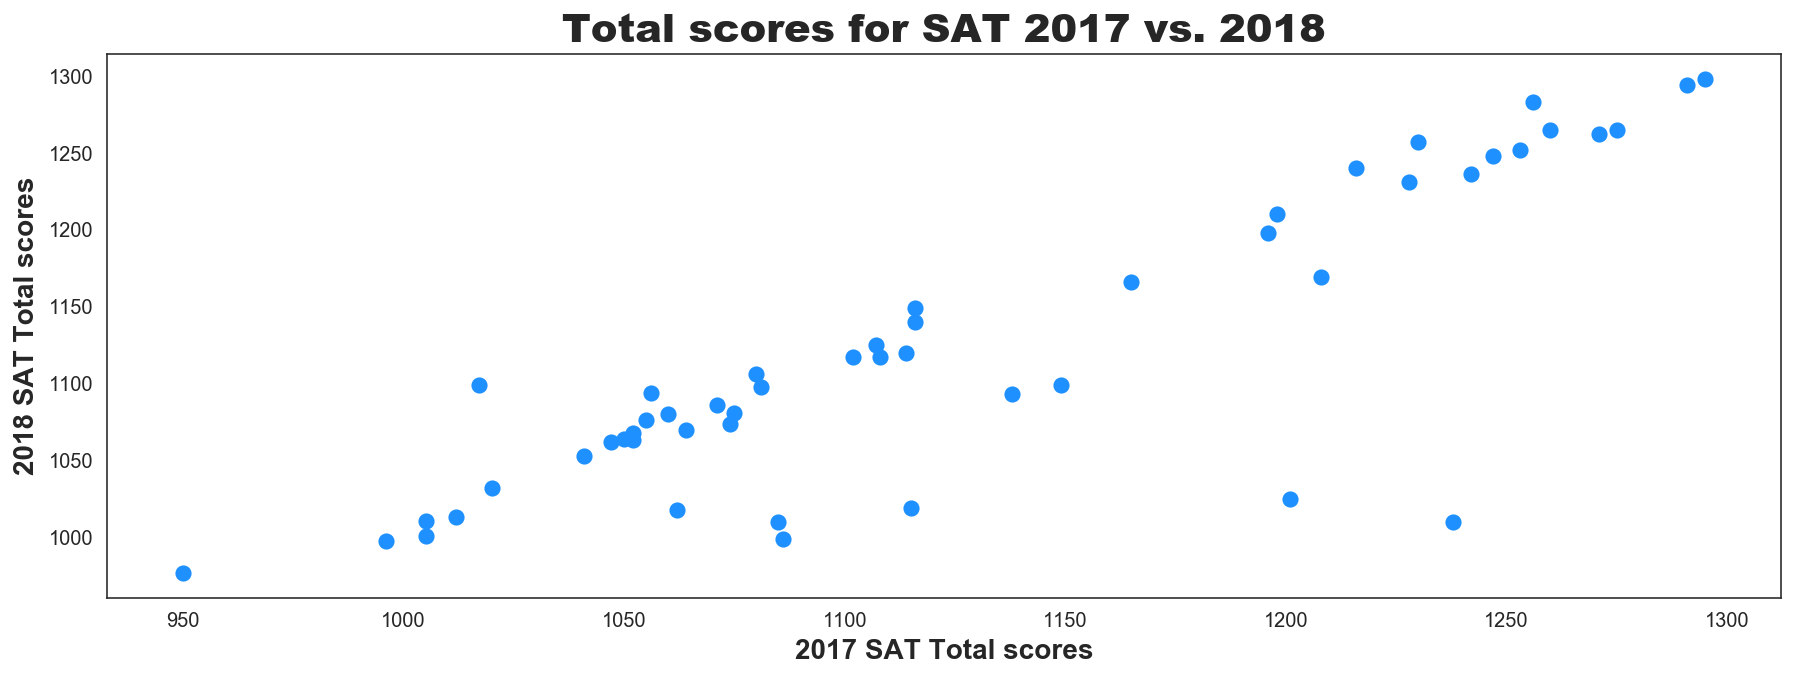

In [81]:
#Plot Total scores for SAT 2017 vs. 2018
plot_scatter(df, 'sat17_total', 'sat18_total', 'Total scores for SAT 2017 vs. 2018', '2017 SAT Total scores', '2018 SAT Total scores')

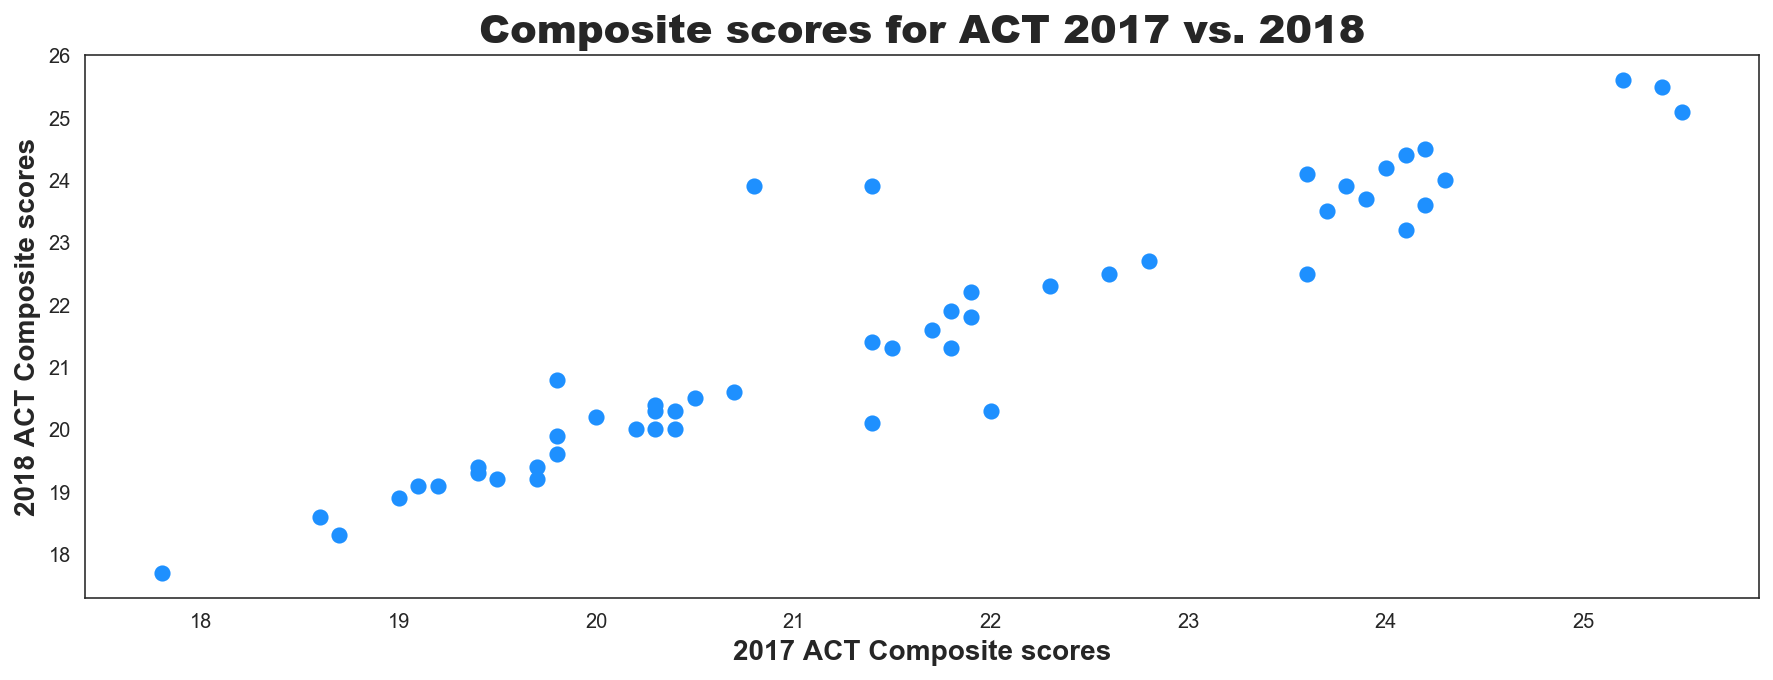

In [82]:
#Plot Composite scores for ACT 2017 vs. 2018
plot_scatter(df, 'act17_composite', 'act18_composite', 'Composite scores for ACT 2017 vs. 2018', '2017 ACT Composite scores', '2018 ACT Composite scores')

Generally follows a linear relationship for the year on year average total/composite scores for each test.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

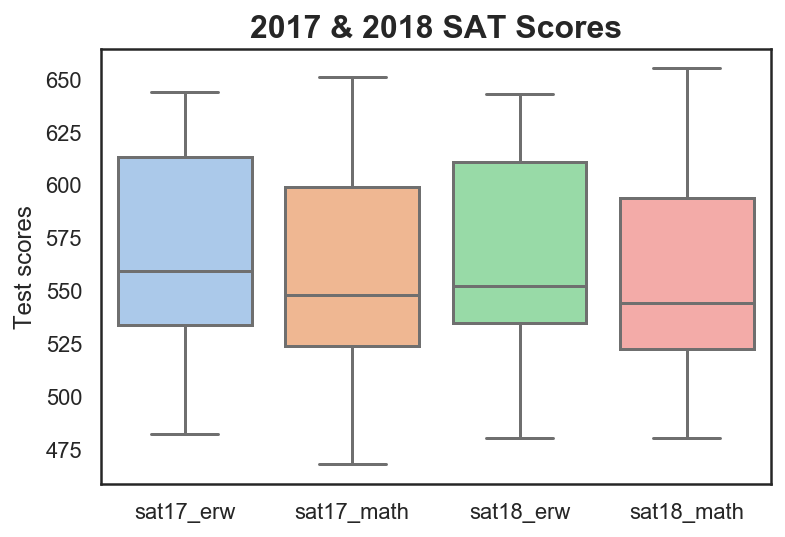

In [83]:
#Plot 2017 & 2018 SAT scores
sns.set(style='white',palette='pastel')
sat_scores = ['sat17_erw', 'sat17_math' , 'sat18_erw' , 'sat18_math']
sns.boxplot(data=df[sat_scores],orient='v')
plt.title('2017 & 2018 SAT Scores',fontsize='16', fontweight='bold');
plt.ylabel('Test scores');
#SAT section scores have similar min, max, and median scores based on the box plot
#min: approx. 460~480
#median: approx. 540~560
#max: approx 635 ~ 655

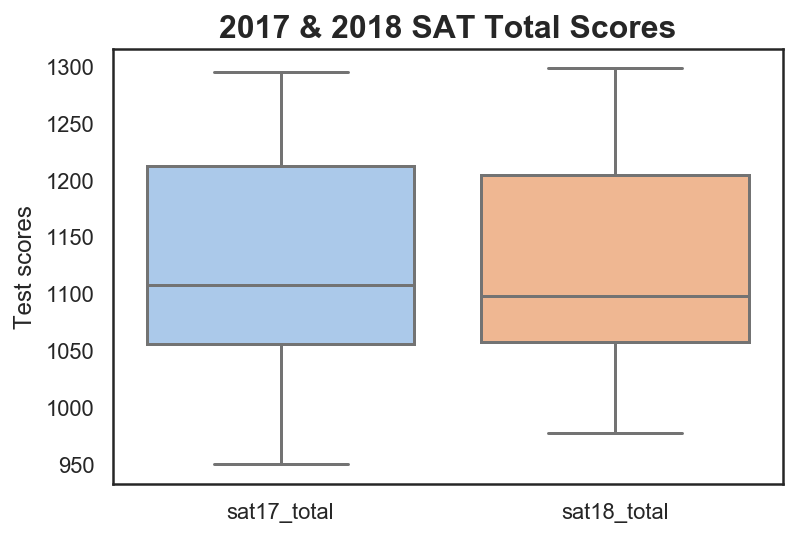

In [84]:
#Plot 2017 & 2018 SAT Total scores
sat_total_scores = ['sat17_total', 'sat18_total']
sns.boxplot(data=df[sat_total_scores],orient='v')
plt.title('2017 & 2018 SAT Total Scores',fontsize='16', fontweight='bold');
plt.ylabel('Test scores');
#SAT total scores have similar min, max, and median scores based on the box plot
#min: approx. 950~980
#median: approx. 1050~1110
#max: approx 1280~1300

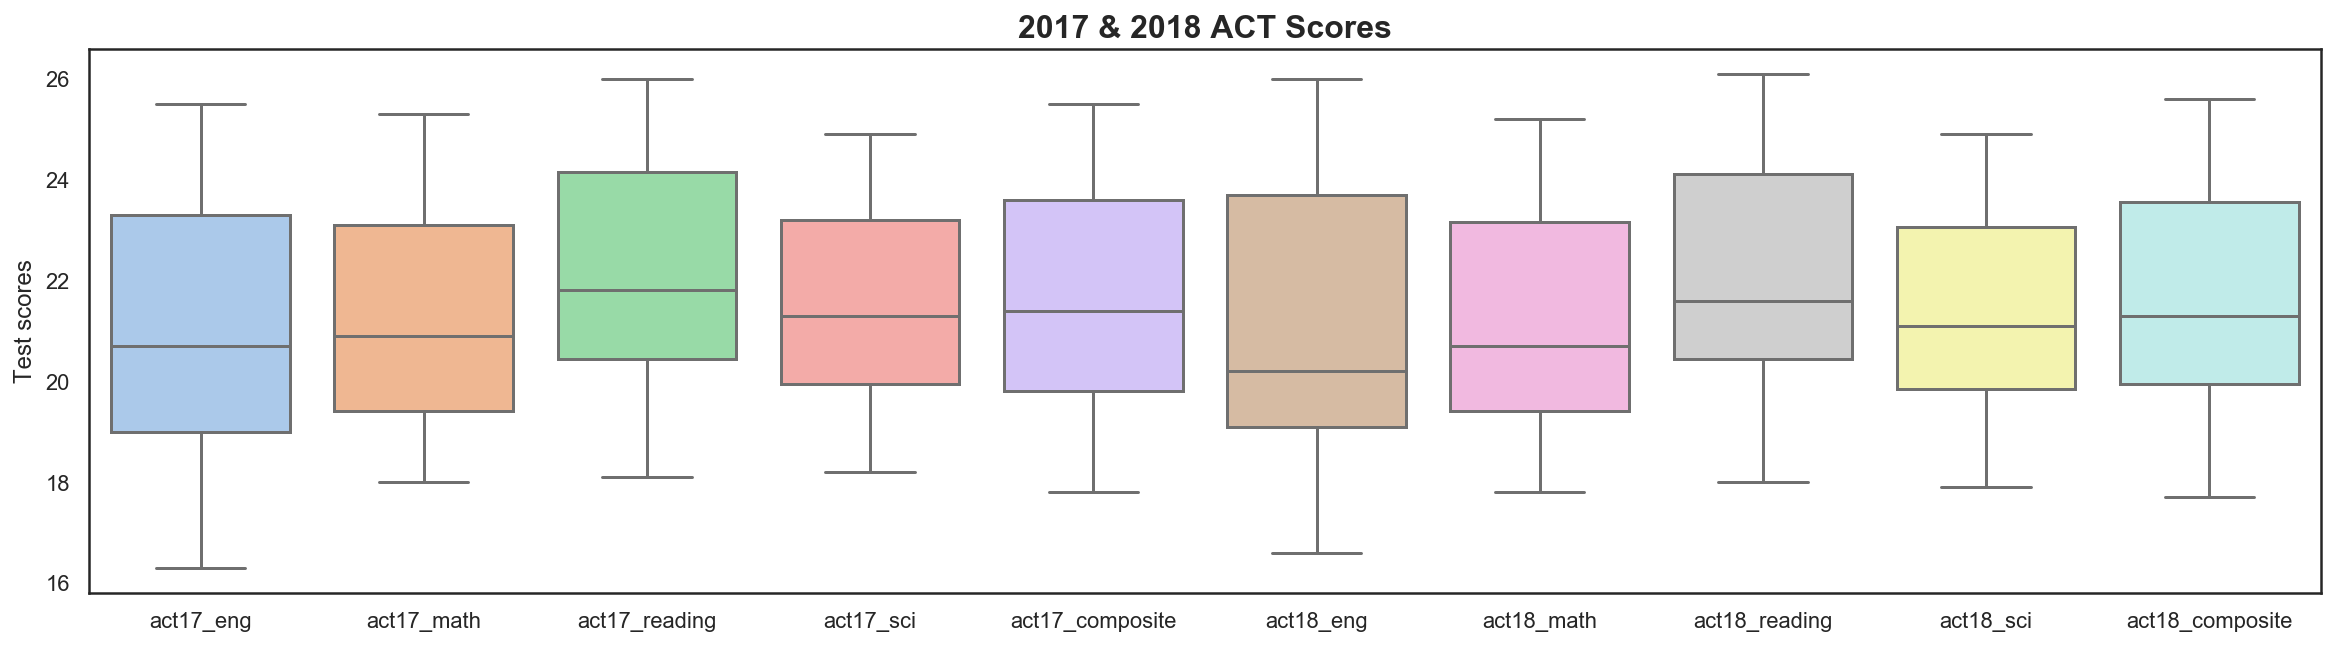

In [85]:
#Plot 2017 & 2018 ACT scores
act_scores = ['act17_eng', 'act17_math', 'act17_reading','act17_sci','act17_composite', 'act18_eng', 'act18_math', 'act18_reading','act18_sci','act18_composite']
plt.figure(figsize=(20,5))
sns.boxplot(data=df[act_scores],orient='v')
plt.title('2017 & 2018 ACT Scores',fontsize='16', fontweight='bold');
plt.ylabel('Test scores');

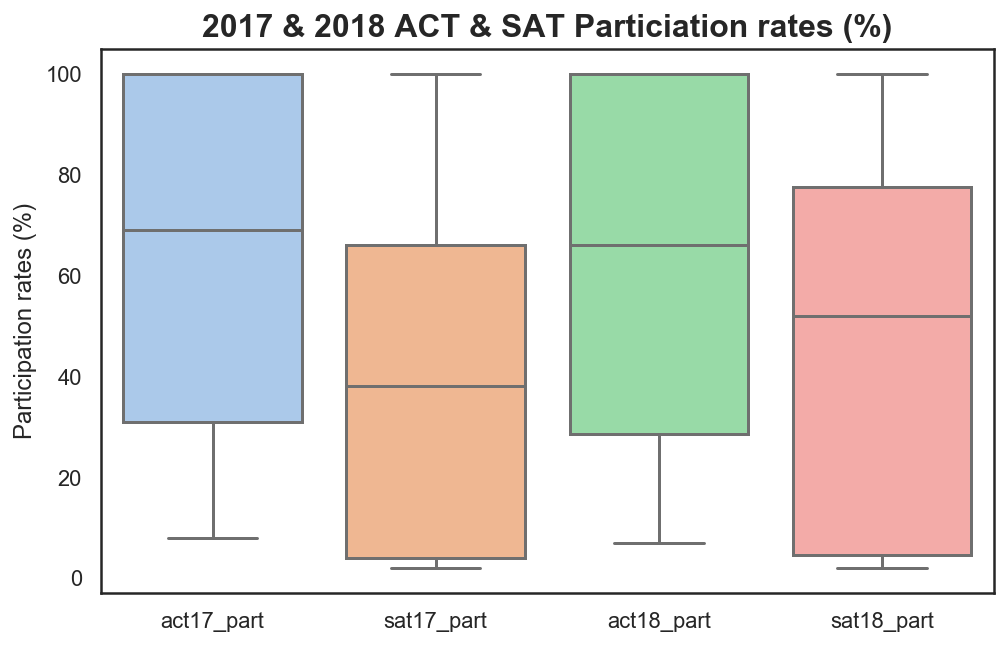

In [86]:
#Plot 2017 & 2018 ACT & SAT Particiation rates
plt.figure(figsize=(8,5))
sns.boxplot(data=df[parts],orient='v')
plt.title('2017 & 2018 ACT & SAT Particiation rates (%)',fontsize='16', fontweight='bold');
plt.ylabel('Participation rates (%)');

Apparently, more than half the states have more than 60% participation in ACT for the year 2017-2018, while only 10~25% of the states have at least 60% participation rate in SAT for the year 2017-2018.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

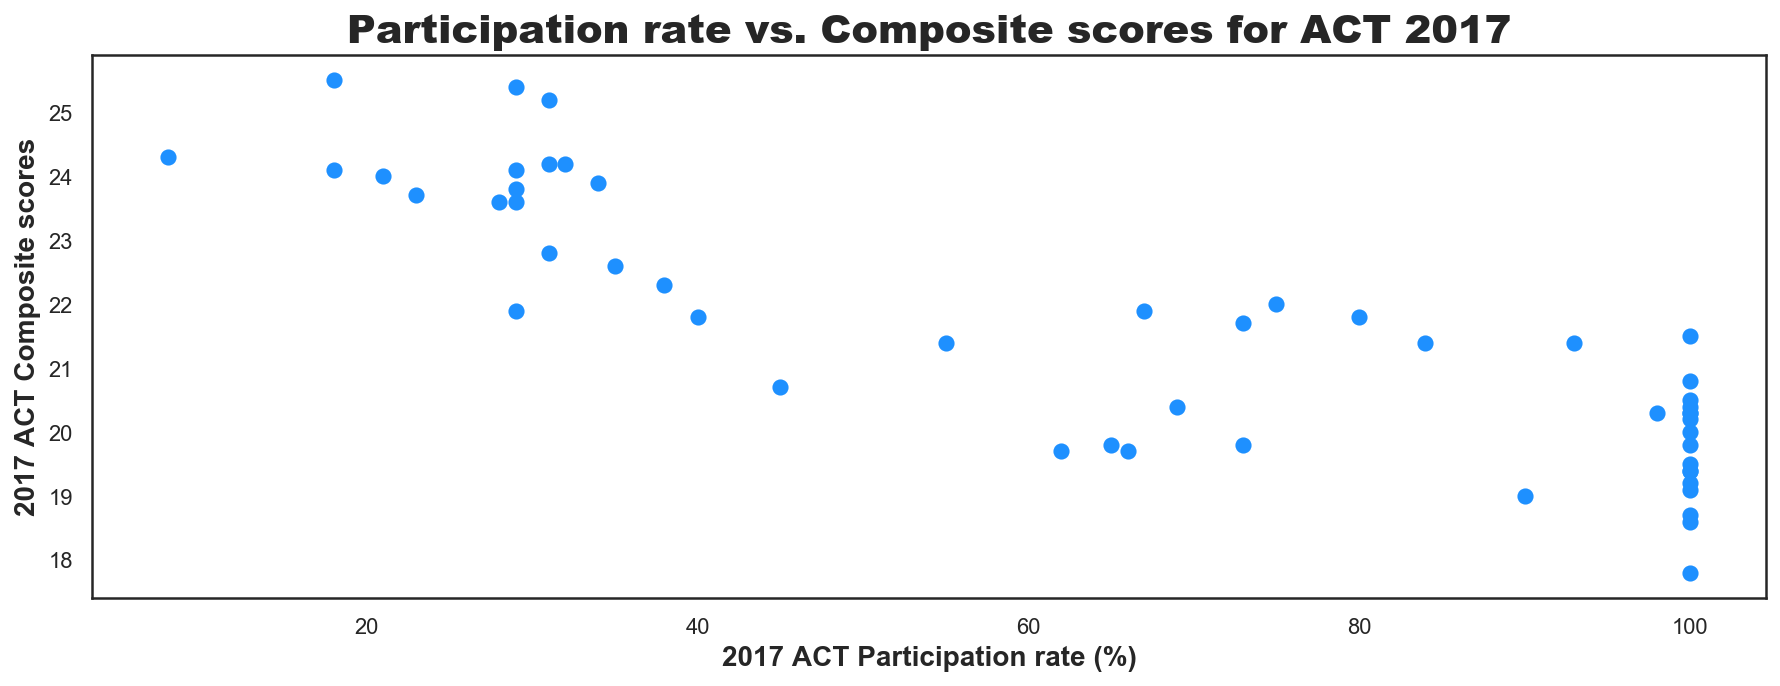

In [87]:
#Plot Participation rate vs. Composite scores for ACT 2017
#shows inverse relationship between participation rate and composite scores
plot_scatter(df, 'act17_part', 'act17_composite', 'Participation rate vs. Composite scores for ACT 2017', '2017 ACT Participation rate (%)', '2017 ACT Composite scores')

In [88]:
def subplot_scatter(dataframe, list_of_xcolumns, list_of_ycolumns,list_of_titles, list_of_xlabels, list_of_ylabels, sharexaxis, shareyaxis):
    nrows = int(np.ceil(len(list_of_xcolumns)/2)) 
    fig, ax = plt.subplots(nrows=nrows, ncols=2, sharex=sharexaxis, sharey=shareyaxis, figsize=(20,10))
    ax = ax.ravel() 
    for i, xcolumn in enumerate(list_of_xcolumns):
        ax[i].scatter(dataframe[xcolumn],dataframe[list_of_ycolumns[i]]) 
        ax[i].set_title(list_of_titles[i],fontweight='bold',fontsize='16')
        ax[i].set_xlabel(list_of_xlabels[i], fontsize='12')
        ax[i].set_ylabel(list_of_ylabels[i], fontsize='12')
        
    fig.tight_layout();


In [89]:
parts

['act17_part', 'sat17_part', 'act18_part', 'sat18_part']

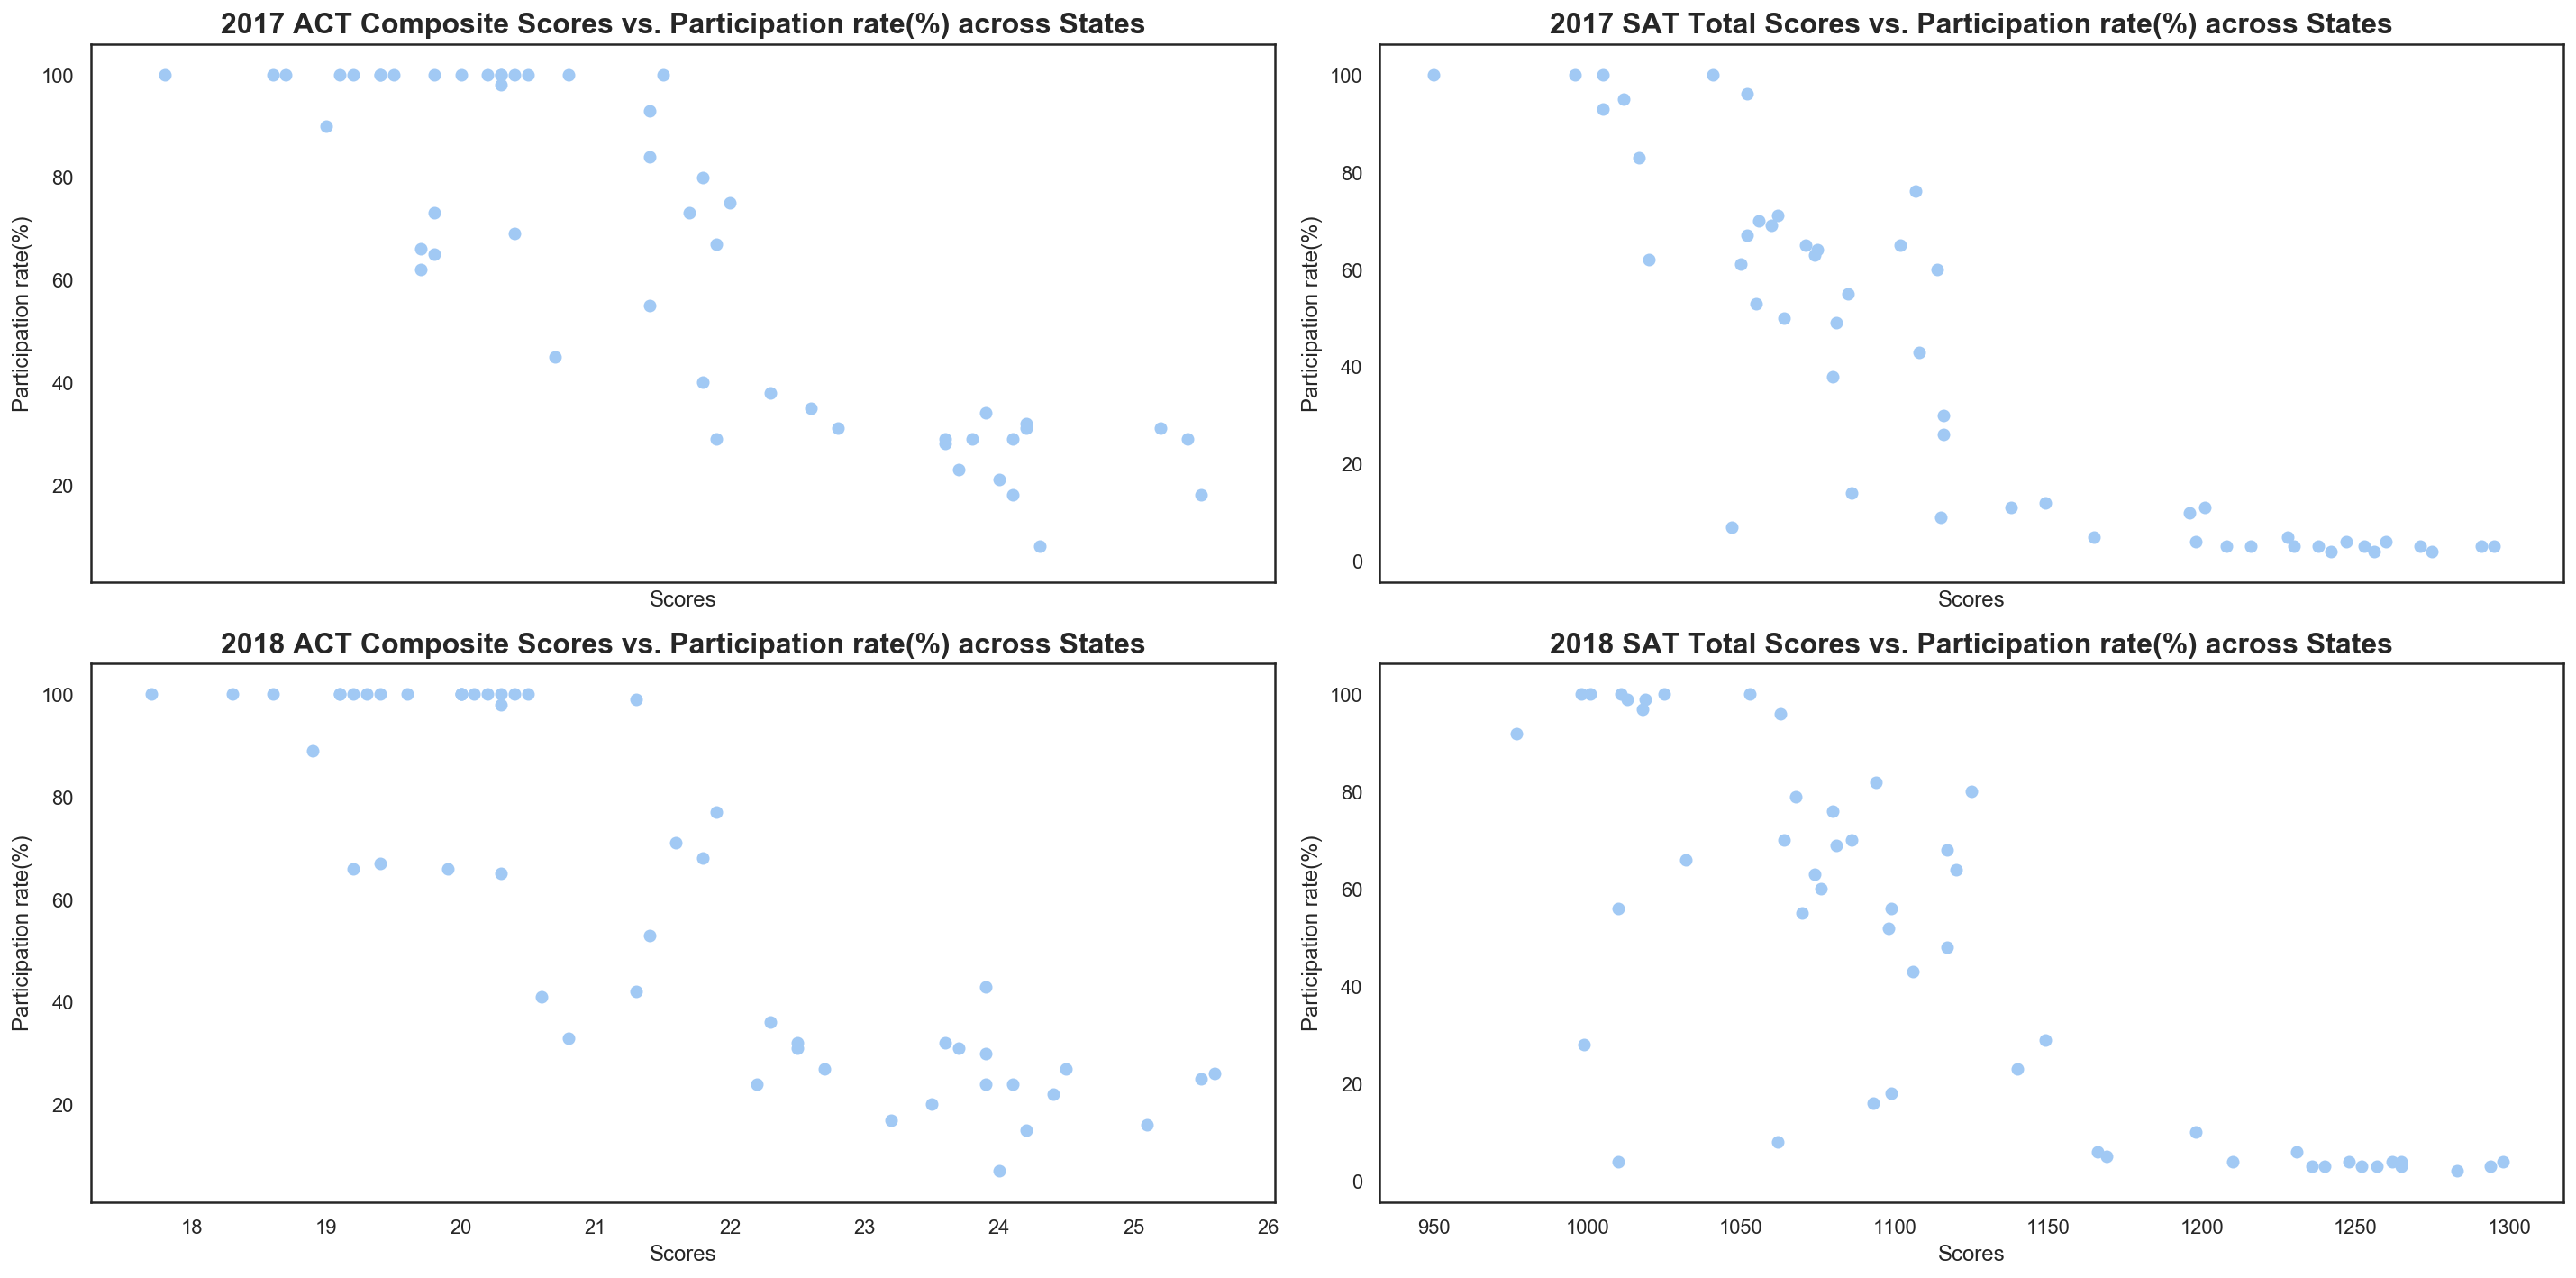

In [90]:
#Plot Participation rate vs. Composite/Total scores for ACT and SAT 2017 and 2018
subplot_scatter(df,
                   ['act17_composite', 'sat17_total', 'act18_composite','sat18_total'],
                parts,
                   ['2017 ACT Composite Scores vs. Participation rate(%) across States', 
                    '2017 SAT Total Scores vs. Participation rate(%) across States', 
                    '2018 ACT Composite Scores vs. Participation rate(%) across States', 
                    '2018 SAT Total Scores vs. Participation rate(%) across States'],
                   ["Scores" for i in range(4)],
                   ["Participation rate(%)" for i in range(4)],
                  'col', 'col')

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

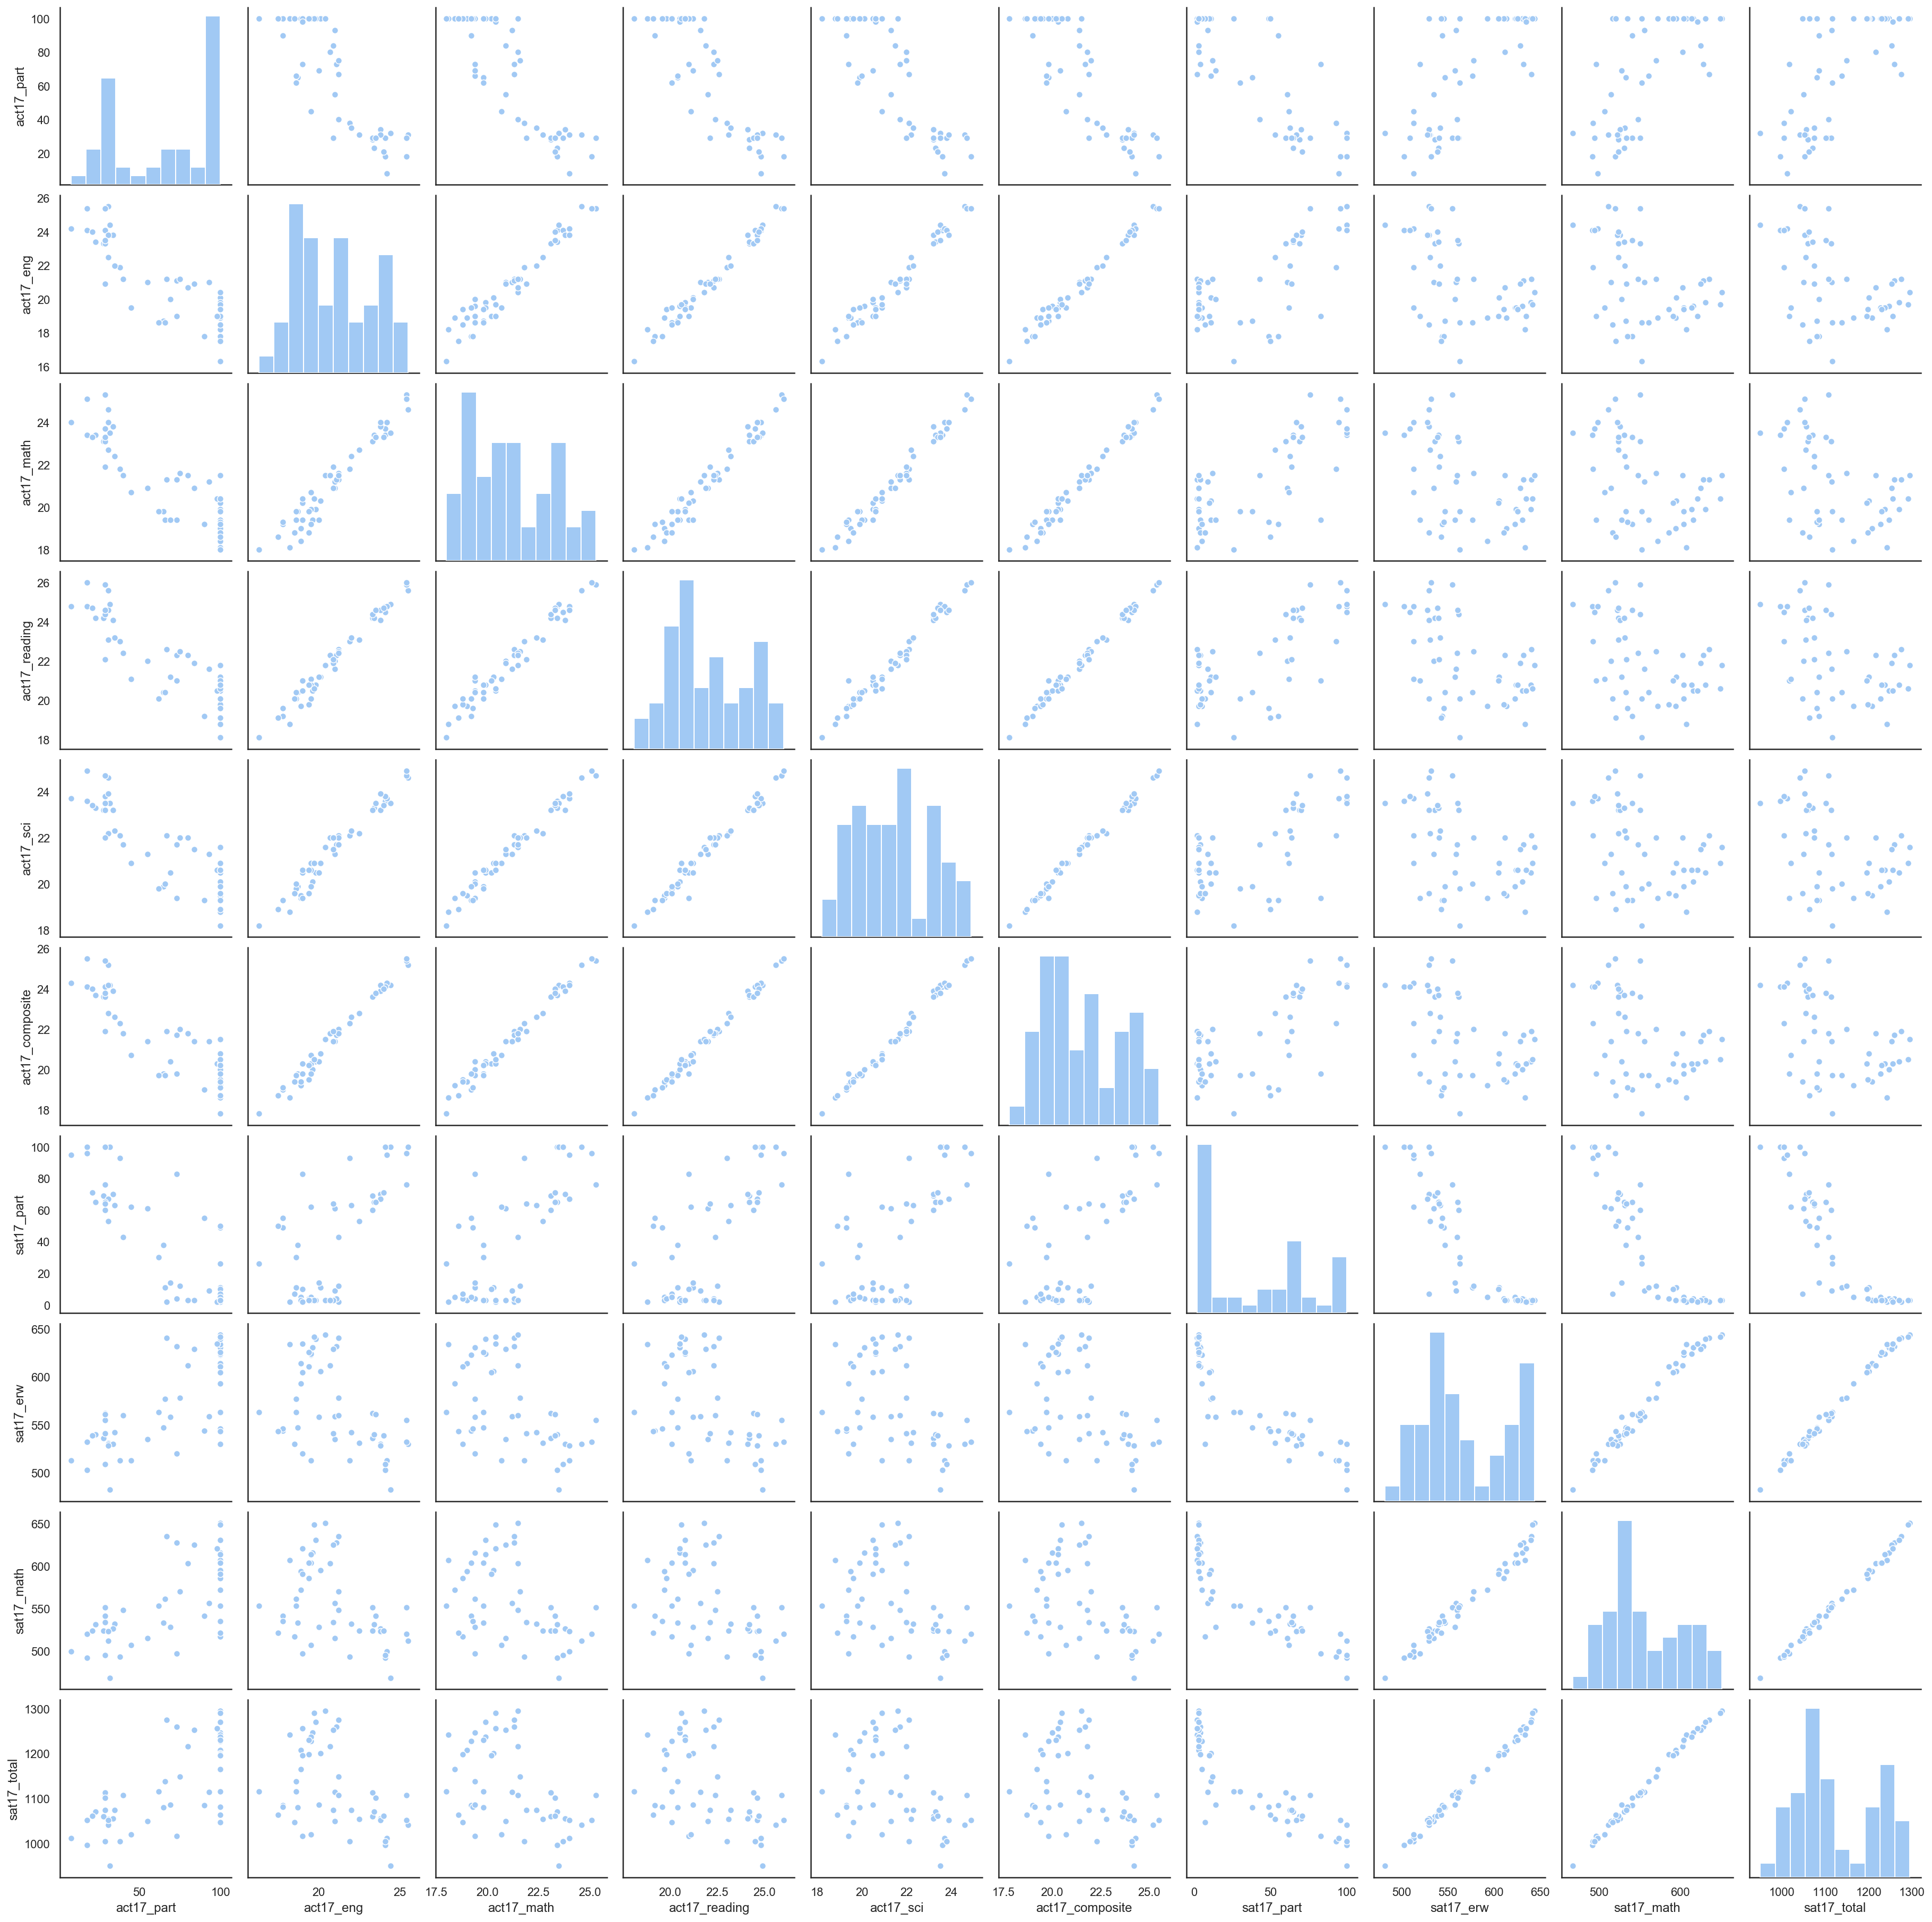

In [91]:
sns.pairplot(df17)

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

The scores are derived from the average from each state with carying population sizes, but not weighted by population size.
However, with the Central Limit Theorem, we should expect to see the data form a normal distribution as the number of sample population increase in size.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

As the size of our sample n gets closer and closer to infinity, our sampling distribution (the distribution of all possible sample means) approaches a Normal distribution with mean μ and standard deviation √σ.

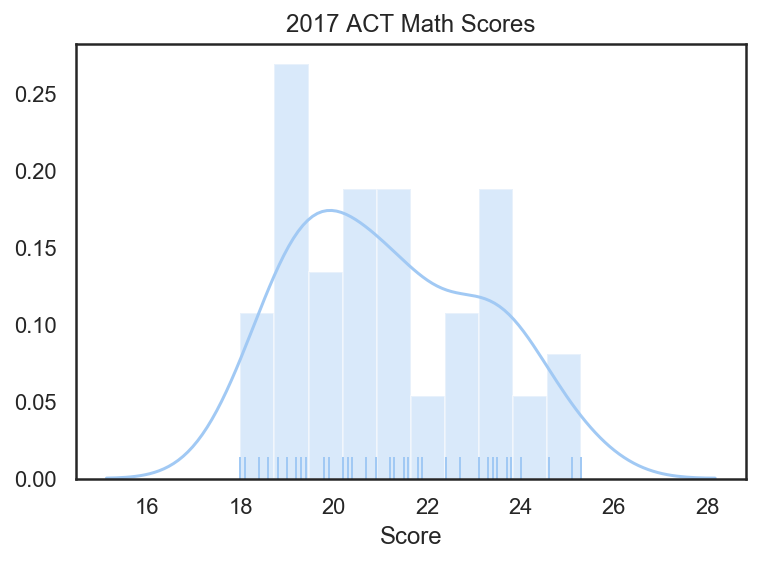

In [92]:
plt.title('2017 ACT Math Scores')
ax = sns.distplot(df['act17_math'], bins=10, kde=True, rug=True)
plt.xlabel('Score');
#The 2017 ACT Math Scores are slightly right-skewed. Would gradually follow a normal distribution as sample size increases

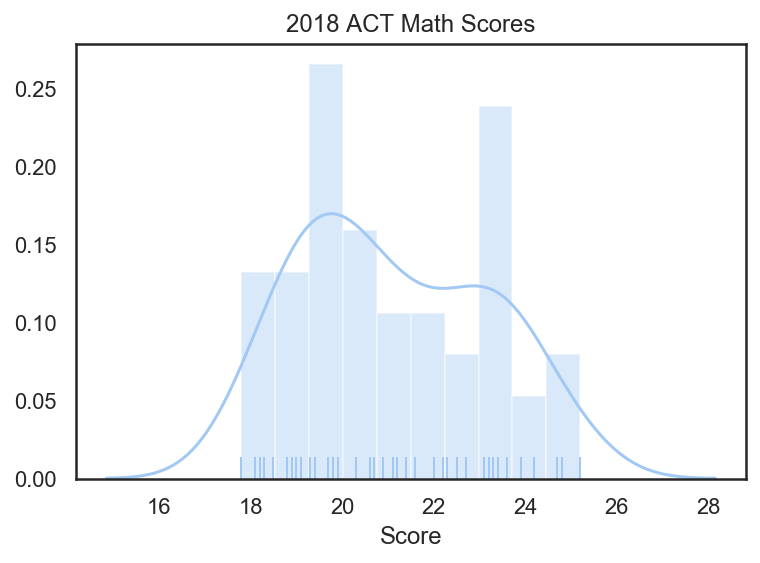

In [93]:
plt.title('2018 ACT Math Scores')
ax = sns.distplot(df['act18_math'], bins=10, kde=True, rug=True)
plt.xlabel('Score');
#The 2018 ACT Math Scores are slightly right-skewed. Would gradually follow a normal distribution as sample size increases

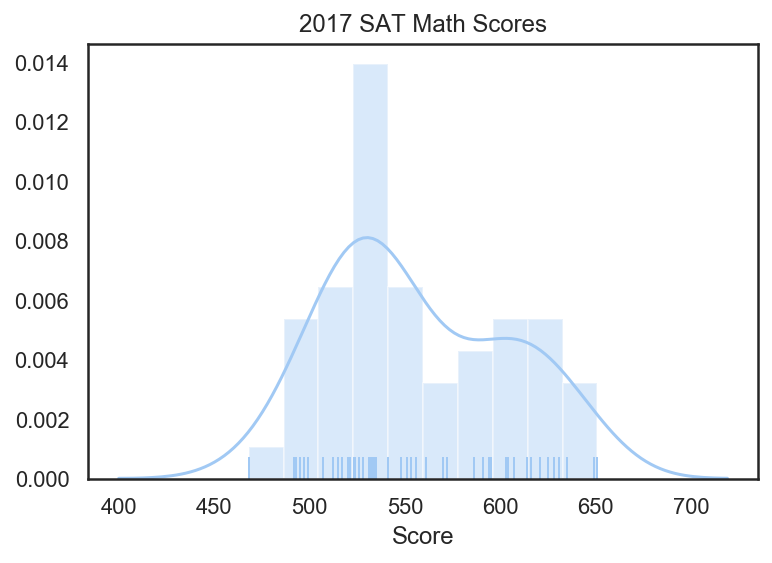

In [94]:
plt.title('2017 SAT Math Scores')
ax = sns.distplot(df['sat17_math'], bins=10, kde=True, rug=True)
plt.xlabel('Score');
#The 2017 SAT Math Scores are slightly right-skewed. Would gradually follow a normal distribution as sample size increases

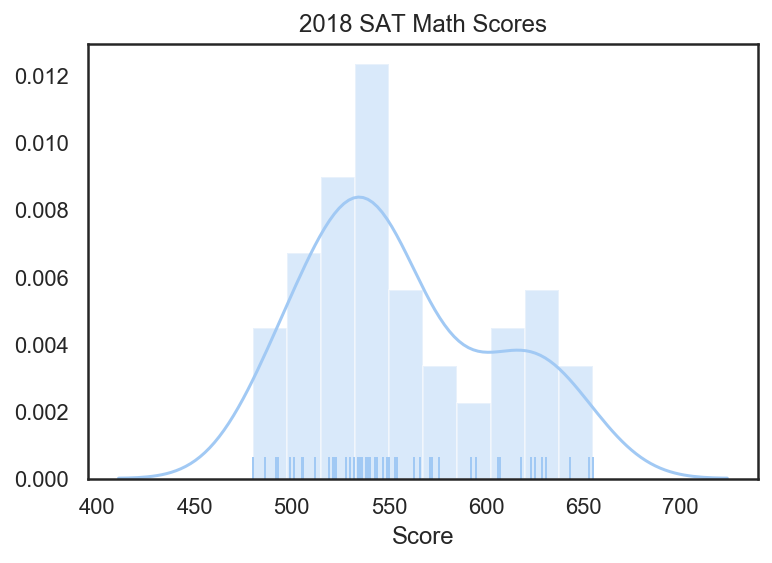

In [95]:
plt.title('2018 SAT Math Scores')
ax = sns.distplot(df['sat18_math'], bins=10, kde=True, rug=True)
plt.xlabel('Score');
#The 2018 SAT Math Scores are slightly right-skewed. Would gradually follow a normal distribution as sample size increases

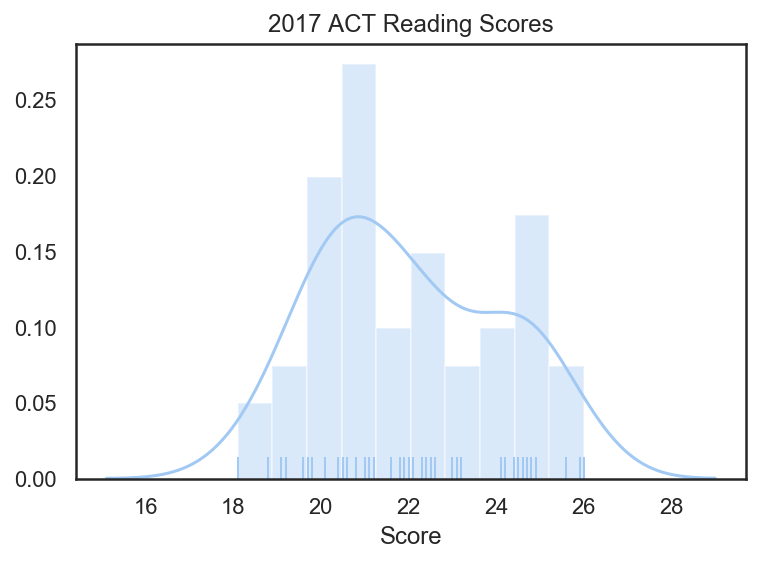

In [96]:
plt.title('2017 ACT Reading Scores')
ax = sns.distplot(df['act17_reading'], bins=10, kde=True, rug=True)
plt.xlabel('Score');


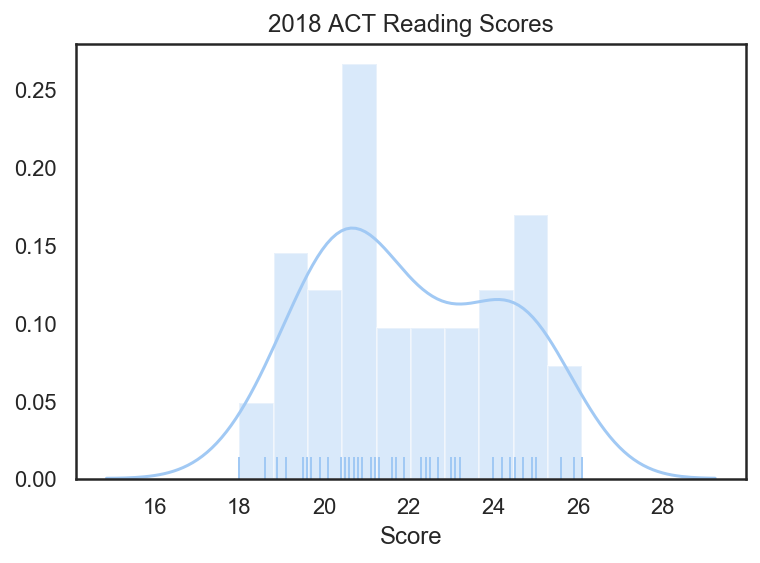

In [97]:
plt.title('2018 ACT Reading Scores')
ax = sns.distplot(df['act18_reading'], bins=10, kde=True, rug=True)
plt.xlabel('Score');


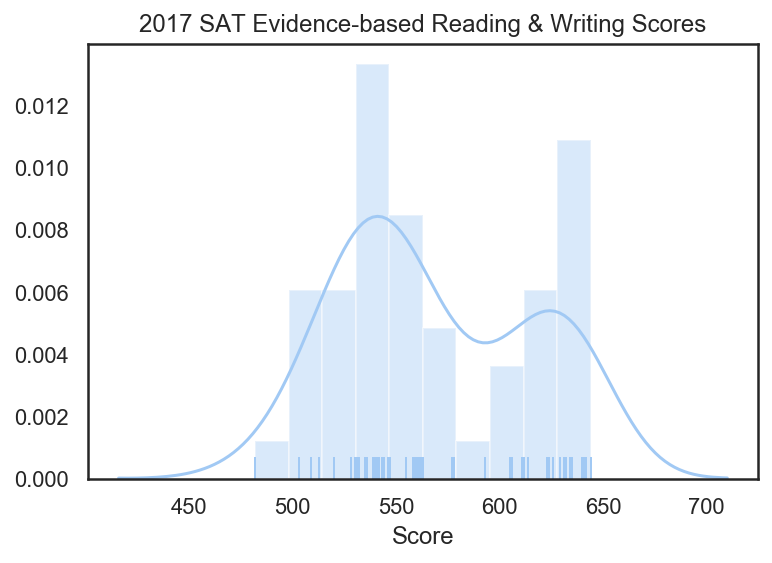

In [98]:
plt.title('2017 SAT Evidence-based Reading & Writing Scores')
ax = sns.distplot(df['sat17_erw'], bins=10, kde=True, rug=True)
plt.xlabel('Score');

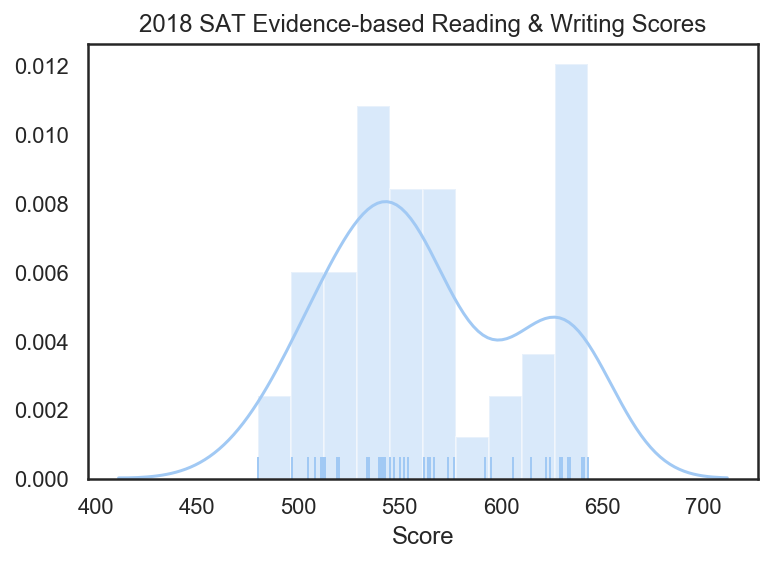

In [99]:
ax = sns.distplot(df['sat18_erw'], bins=10, kde=True, rug=True)
plt.title('2018 SAT Evidence-based Reading & Writing Scores')
plt.xlabel('Score');

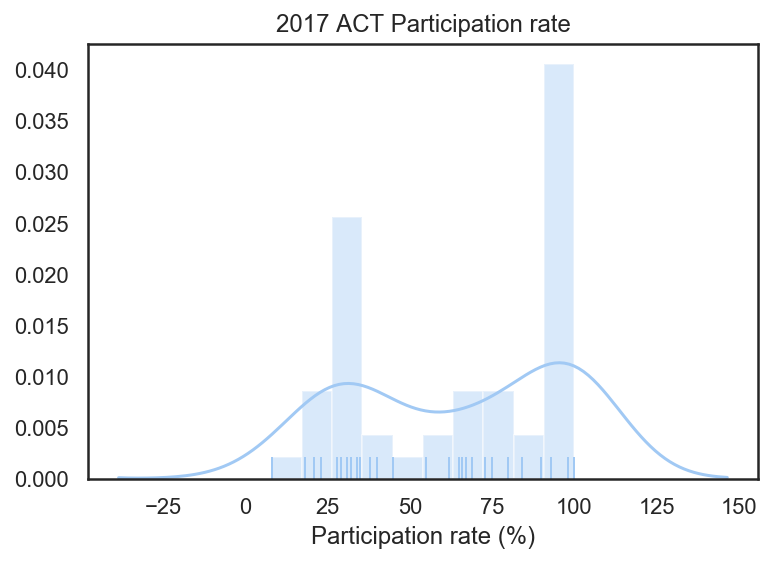

In [100]:
plt.title('2017 ACT Participation rate')
ax = sns.distplot(df['act17_part'], bins=10, kde=True, rug=True)
plt.xlabel('Participation rate (%)');

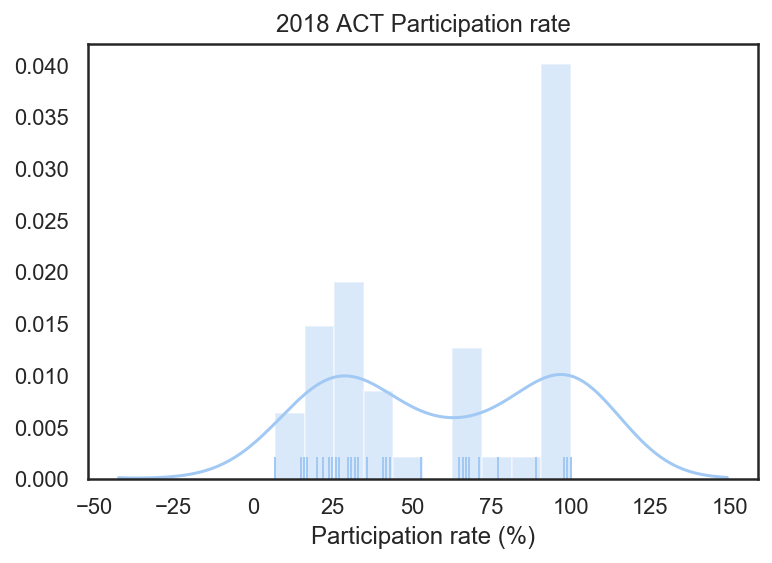

In [101]:
plt.title('2018 ACT Participation rate')
ax = sns.distplot(df['act18_part'], bins=10, kde=True, rug=True)
plt.xlabel('Participation rate (%)');

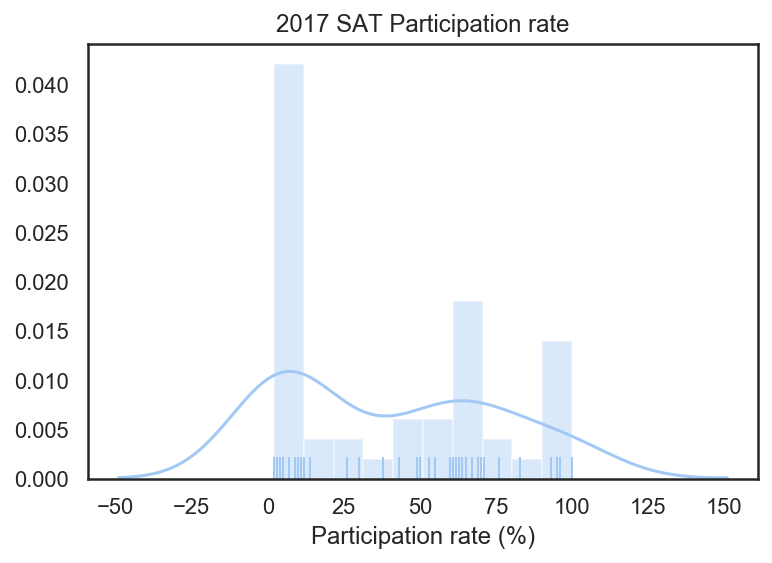

In [102]:
plt.title('2017 SAT Participation rate')
ax = sns.distplot(df['sat17_part'], bins=10, kde=True, rug=True)
plt.xlabel('Participation rate (%)');

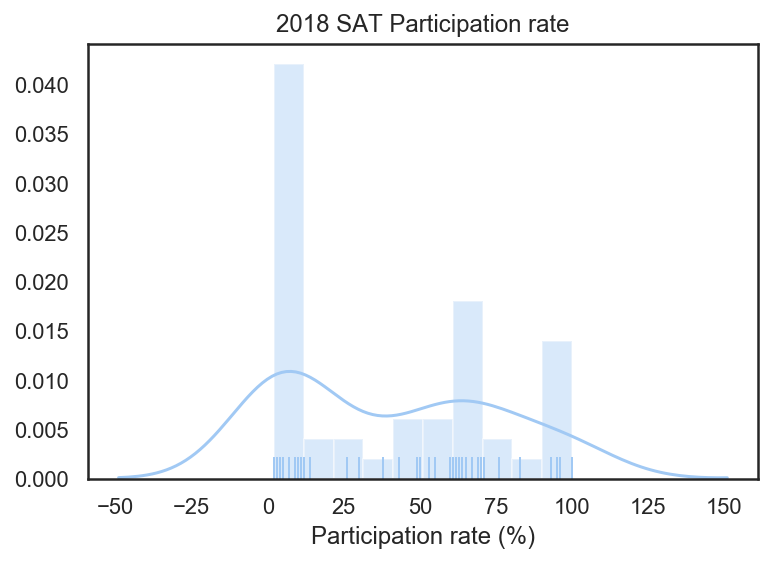

In [103]:
plt.title('2018 SAT Participation rate')
ax = sns.distplot(df['sat17_part'], bins=10, kde=True, rug=True)
plt.xlabel('Participation rate (%)');

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:
We would require a more granular level analysis as the data is based on an average score per state, and the population size on each category (state) varies. 
Probably observations by districts
This would mean a much larger dataset to get a more detailed analysis and statistical inference from a more granular source.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: Scores are evaluated on a different set of criteria and scale. SAT Math scores range from 200 to 800 while ACT Math scores range from 1-36.  There would not be a good way to compare the two unless they are evaluated on a similar rubric and scaled accordingly.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [104]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [105]:
act_chng = (df['act18_part'].values)-(df['act17_part'].values)
sat_chng = (df['sat18_part'].values)-(df['sat17_part'].values)

In [106]:
dictpc = {'state' : df['state'].values, 'act_partchng': act_chng, 'sat_partchng': sat_chng}

In [107]:
df_partchng = pd.DataFrame(data= dictpc)

In [108]:
df_partchng.sort_values('act_partchng',ascending=False).tail(3)

,state,act_partchng,sat_partchng
1,Alaska,-32,5
13,Illinois,-50,90
5,Colorado,-70,89


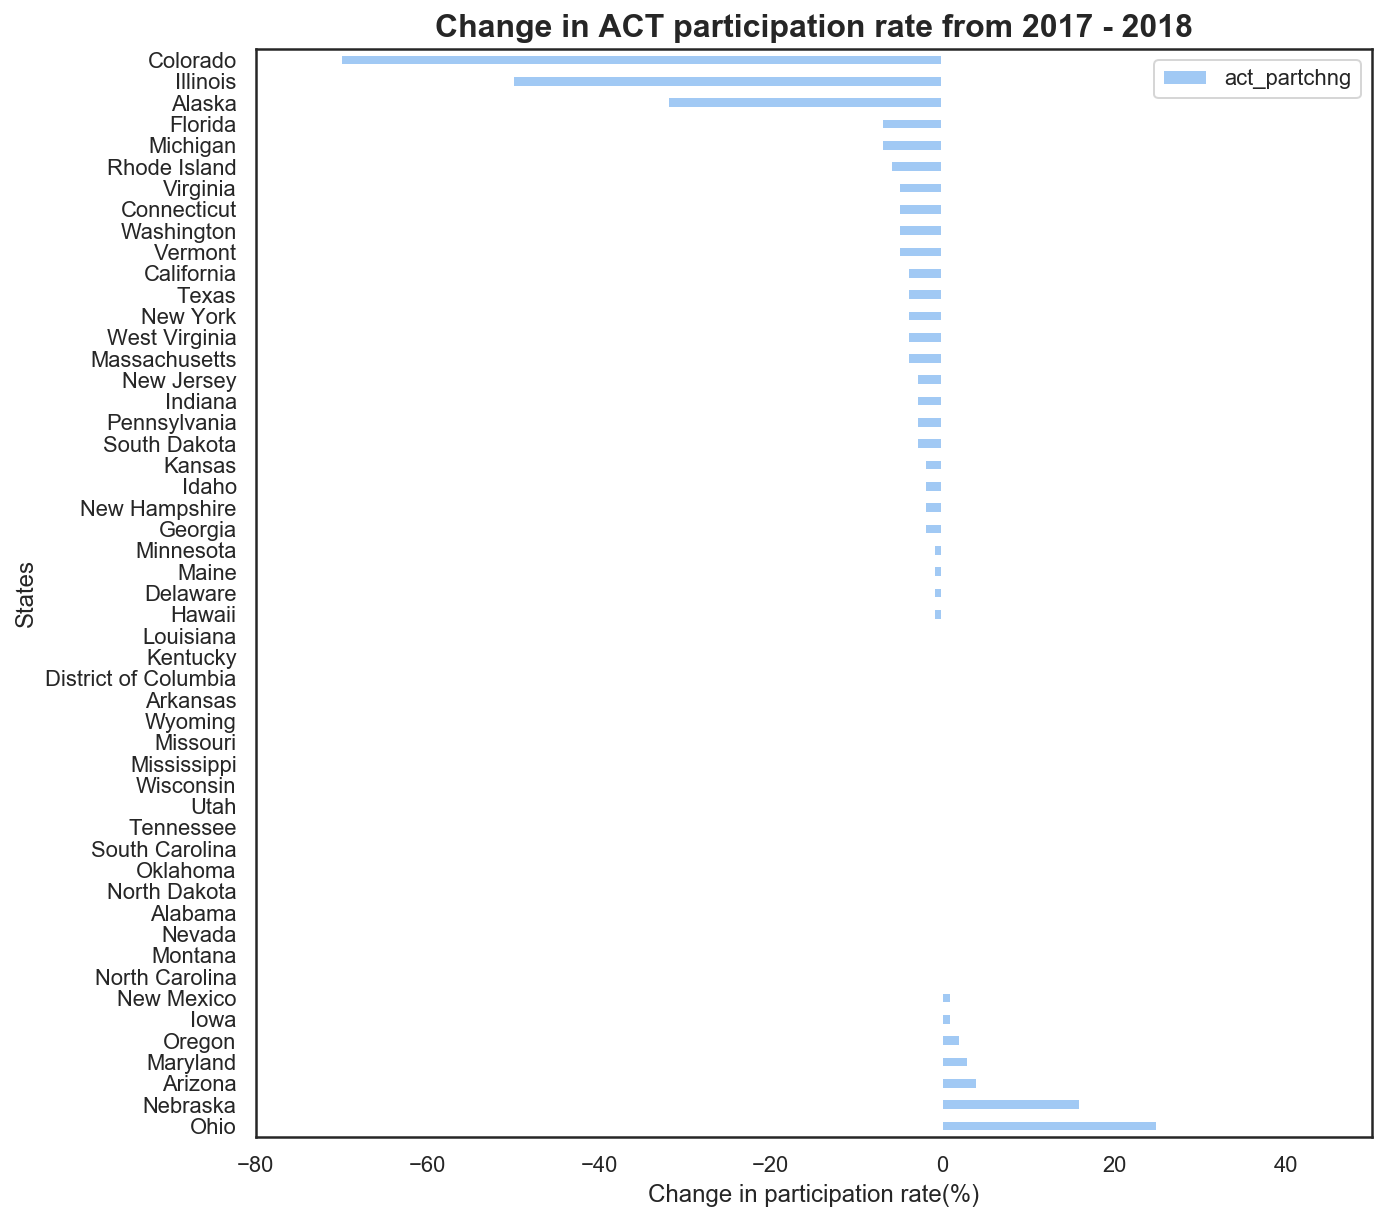

In [109]:
df_partchng.sort_values('act_partchng',ascending=False).plot(x='state', y='act_partchng', kind='barh',figsize=(10,10),xlim=(-80,50));
plt.title('Change in ACT participation rate from 2017 - 2018',fontweight='heavy',fontsize='16')
plt.xlabel('Change in participation rate(%)')
plt.ylabel('States');

In [110]:
df_partchng.sort_values('sat_partchng',ascending=False).head(3)

,state,act_partchng,sat_partchng
13,Illinois,-50,90
5,Colorado,-70,89
39,Rhode Island,-6,26


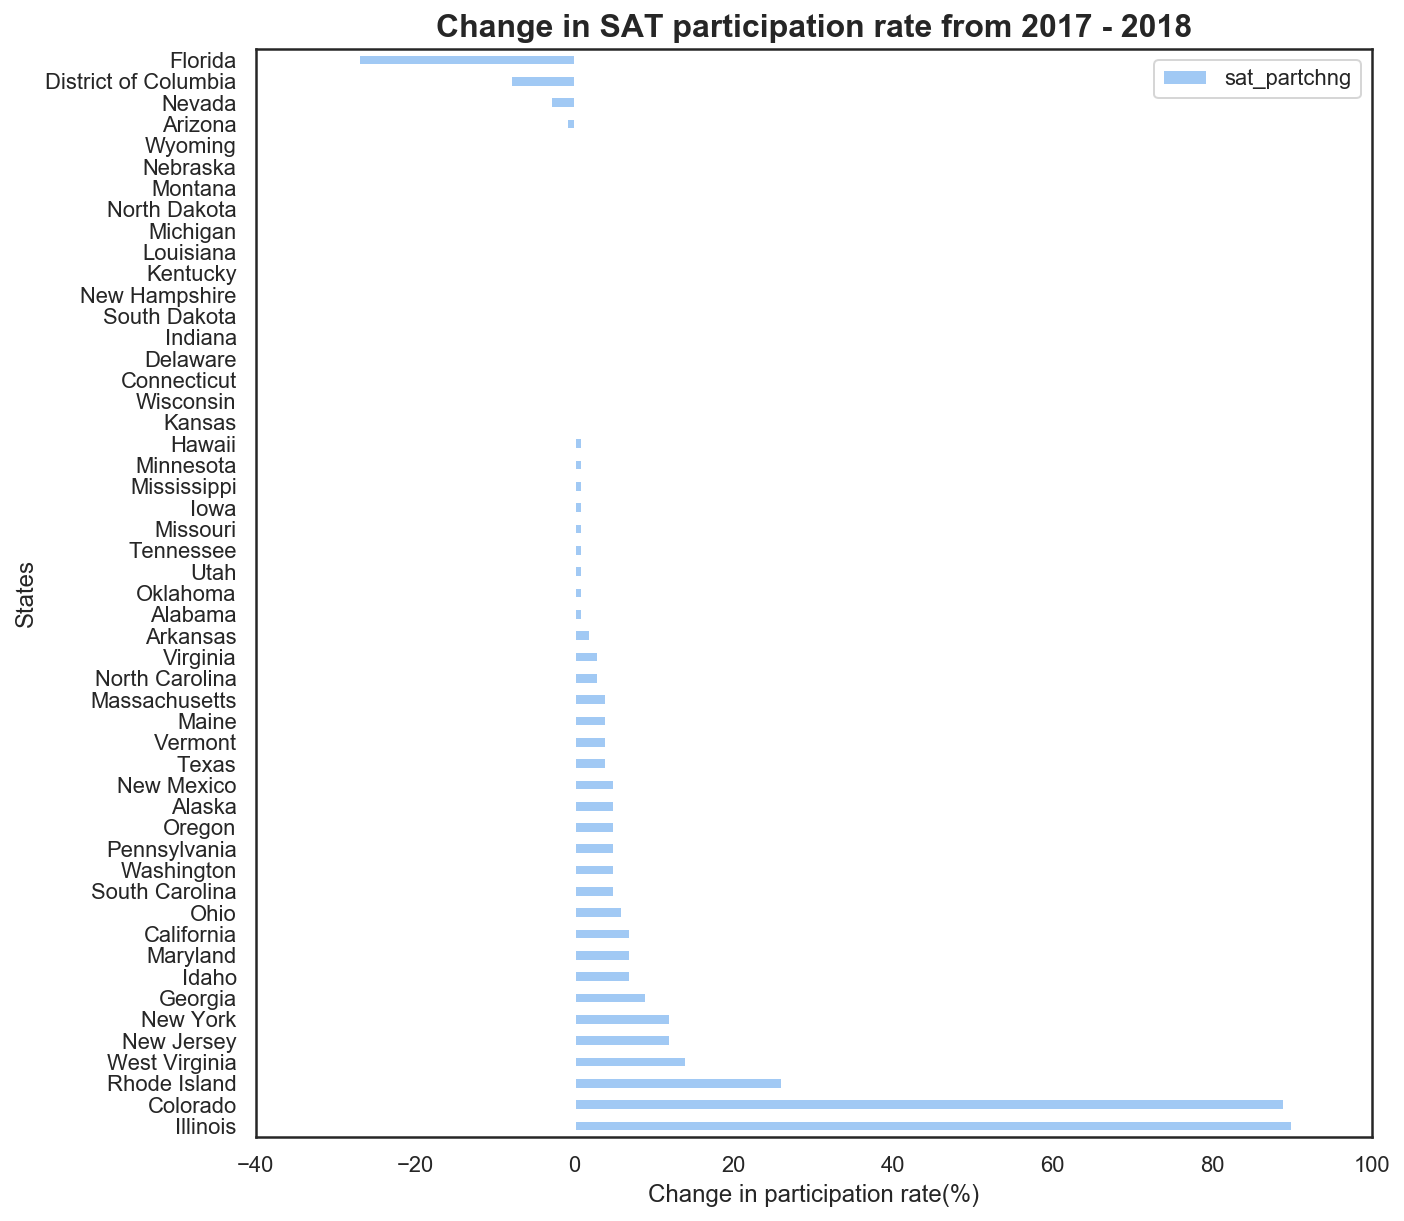

In [111]:
df_partchng.sort_values('sat_partchng',ascending=False).plot(x='state', y='sat_partchng', kind='barh',figsize=(10,10),xlim=(-40,100));
plt.title('Change in SAT participation rate from 2017 - 2018',fontweight='heavy',fontsize='16')
plt.xlabel('Change in participation rate(%)')
plt.ylabel('States');

Based upon your observations, choose three states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. Feel free to go back and create new plots that highlight these states of interest. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

<u>Chart 1: Change in ACT Participation rate from 2017 to 2018</u><br><br>
Top 3 states with largest change: <br>
1. Colorado: -70%<br>
2. Illinois: -50%<br>
3. Alaska: -32%<br>

<br>

<br>
<u>Chart 2: Change in SAT Participation rate from 2017 to 2018</u><br><br>
Top 3 states with largest change: <br>
1. Colorado: +90% <br>
2. Illinois: +89% <br>
3. Rhode Island: +26% <br>



<b>A. Colarado</b><br>

Since 2001, Colorado has made ACT a mandatory test as their 11th grade college entrance exam, for which the state covered the cost. In December 2015, the state Department of Education announced that a selection committee chose The College Board, makers of the SAT, over the ACT testing company in a competitive bidding process required by hard-fought testing reform legislation. The policy goal was to reduce the amount of time consumed by testing, and to use high school tests that are more focused than PARCC on college readiness.

The SAT is aligned to the Colorado Academic Standards and measures the skills and knowledge that research shows are critical for college and career readiness, including critical thinking and analytical reasoning. This may have been the main reason for choosing SAT over ACT, since the SAT seemed more reason-based and focused on critical thinking, while the ACT seemed more of a fact-recall test.

Colorado’s full transition to the SAT was made in spring 2017, which brought about the drastic increment of 90% in participation rate from 2017 to 2018, and consequently decrease in participation rate in ACT.

<br><br>
<i>sources: https://www.coloradokids.org/colorado-switches-from-act-to-sat-for-high-school-college-entrance-assessments/
<br>
https://co.chalkbeat.org/2015/12/15/21092474/testing-giants-vie-to-provide-colorado-high-school-exams#.Vnsoy5MrL-Y
 <br>  https://co.chalkbeat.org/2015/12/23/21092477/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers#.VosZg5MrK3U
<br>
https://co.chalkbeat.org/2016/1/4/21092496/act-may-get-one-more-year-as-colorado-s-mandatory-11th-grade-test#.VpAf0vkrKUl

</i><br><br>
<b>B. Illinois</b><br>

The ACT exam had been given to high school juniors in Illinois for the past 15 years. Since the ACT's contract with the state ended on 30 June 2017, a new contract was made between the College Board and the Illinois State Board of Education "ISBE" to give its exam (SAT) to all public high school juniors in Illinois.

Accordingly, the ISBE weighed the attributes of both exams and decided the SAT was better aligned with standards for what students should know in Illinois.

This transition to the SAT has increased its participation rate to statewide in 2018, and consequently spiking a decrease in participation rate in ACT for the year 2018.

<br><br>
<i>sources:
https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html <br>
 https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/
<br>
</i><br><br>
<br>
<b>C. Alaska</b><br>
The ACT participation rate dropped from 65% to 33%.
Reportedly, the state previously required students to take either ACT or SAT in order to graduate. This Alaska state law has now expired and now students will only need to meet credit requirements to get their diplomas.

This attributes to the 32% decrease in participation rate from 65% to 33%, and since no new state law or contract being made, there seems to be no dominant test being taken in the area as there might be little to no motivations for students to take either ACT or SAT.


<i>source:
https://www.adn.com/alaska-news/education/2016/06/30/students-no-longer-need-national-tests-to-graduate/
<br>
</i><br><br>

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

### Answer:

ACT data shows that more than half the number of states have more than 60% participation rate in the ACT for the year 2017 to 2018, and of which, a number of states who are committed to the ACT and have a 100% participation rate. Comparatively, only 10~25% of states have at least a 60% participation rate in SAT for the year 2017 to 2018.

While we could infer that the ACT is still highly popular among the states based on the distribution plots for participation rates in the two tests for the year 2017 and 2018, we can see that there is an increment in % for SAT participation rates in most states from 2017 to 2018, while a decrease in  ACT participation for most states from 2017 to 2018. 


This means that either the efforts taken by the College Board to make its test mandatory by bidding with the state education boards a success, or its change in format had appealed to the student population in general. 


#### Increasing rates:


Currently, only [25](https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html) states requires students to take either ACT or SAT. 

Through contracts with state and schools, the College Board would be able to increase the SAT participation rate statewide by making it manadatory.

In our research, it became evident that state policies heavily influence the participation rates in the tests in the case of Colorado and Illinois. The SAT participation rate sore close to a 100% after a selection committee chose SAT over ACT in a competitive bidding exercise held by each state education board. These were states that once had approximately 100% participation rate in ACT, while a mere 9~11% participation rate in the 2017 SAT before the new state policy was introduced.

Other recommendations to increase participation rates across the states could include fee waivers, providing coursework materials, and campaigning to the students.

#### Deciding where to focus efforts on:

The cases of Colorado and Illinois had shown that the College Board made it possible by winning state contracts to secure a high SAT participation rate. Hence, there is no <b>one</b> state that we can recommend to focus resources on.

However, they could shortlist states that have made ACT a mandatory test (in which their state contracts are soon to expire), or states that do not show a dominant test preference among the test-takers in the region.

It could mean that once the College Board wins over these state contracts, the participation rates automatically rises in their favor, or they could focus campaigning efforts in states that do not show a dominant test preference in order to win a larger market share in the area.

However, it could become more apparent if there is more data collected on possible factors influencing the participation rates such as: test-takers' household income and participation rates on district and school level.

In [112]:
df[part_cols][df['act18_part'] > 95]

,state,act17_part,act17_composite,act18_part,act18_composite,sat17_part,sat17_total,sat18_part,sat18_total
0,Alabama,100,19.2,100,19.1,5,1165,6,1166
3,Arkansas,100,19.4,100,19.4,3,1208,5,1169
17,Kentucky,100,20.0,100,20.2,4,1247,4,1248
18,Louisiana,100,19.5,100,19.2,4,1198,4,1210
23,Minnesota,100,21.5,99,21.3,3,1295,4,1298
24,Mississippi,100,18.6,100,18.6,2,1242,3,1236
25,Missouri,100,20.4,100,20.0,3,1271,4,1262
26,Montana,100,20.3,100,20.0,10,1196,10,1198
27,Nebraska,84,21.4,100,20.1,3,1253,3,1252
28,Nevada,100,17.8,100,17.7,26,1116,23,1140


In [113]:
df[part_cols][(df['sat18_part']/df['act18_part'] > 1) & (df['sat18_part']/df['act18_part'] < 3) & (df['sat18_part'] < 70)]

,state,act17_part,act17_composite,act18_part,act18_composite,sat17_part,sat17_total,sat18_part,sat18_total
1,Alaska,65,19.8,33,20.8,38,1080,43,1106
4,California,31,22.8,27,22.7,53,1055,60,1076
14,Indiana,35,22.6,32,22.5,63,1074,63,1074
37,Oregon,40,21.8,42,21.3,43,1108,48,1117
43,Texas,45,20.7,41,20.6,62,1020,66,1032
45,Vermont,29,23.6,24,24.1,60,1114,64,1120
46,Virginia,29,23.8,24,23.9,65,1102,68,1117
47,Washington,29,21.9,24,22.2,64,1075,69,1081


In [114]:
df[part_cols][(df['sat18_part']/df['act18_part'] > 1.5) & (df['sat18_part'] < 70) & (df['act18_part'] < 70)]

,state,act17_part,act17_composite,act18_part,act18_composite,sat17_part,sat17_total,sat18_part,sat18_total
4,California,31,22.8,27,22.7,53,1055,60,1076
14,Indiana,35,22.6,32,22.5,63,1074,63,1074
43,Texas,45,20.7,41,20.6,62,1020,66,1032
45,Vermont,29,23.6,24,24.1,60,1114,64,1120
46,Virginia,29,23.8,24,23.9,65,1102,68,1117
47,Washington,29,21.9,24,22.2,64,1075,69,1081
